In [2]:
!pip install datasets
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 4.5 MB/s eta 0:00:00


# Preprocessing Data

##Load and Split Data

In [4]:
from datasets import load_dataset,concatenate_datasets
folder_1 = 'reyscore/3000-4'
train_ds_1 = load_dataset("imagefolder", data_dir=f'/content/drive/MyDrive/data/{folder_1}/train', drop_metadata=False)['train']
test_ds_1 = load_dataset("imagefolder", data_dir=f'/content/drive/MyDrive/data/{folder_1}/test', drop_metadata=False)['train']


Resolving data files:   0%|          | 0/3001 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Resolving data files:   0%|          | 0/301 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
folder_2 = 'reyscore/3000-5'
train_ds_2 = load_dataset("imagefolder", data_dir=f'/content/drive/MyDrive/data/{folder_2}/train', drop_metadata=False)['train']
test_ds_2 = load_dataset("imagefolder", data_dir=f'/content/drive/MyDrive/data/{folder_2}/test', drop_metadata=False)['train']


Resolving data files:   0%|          | 0/3001 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Resolving data files:   0%|          | 0/301 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
folder_3 = 'reyscore/3000-6'
train_ds_3 = load_dataset("imagefolder", data_dir=f'/content/drive/MyDrive/data/{folder_3}/train', drop_metadata=False)['train']
test_ds_3 = load_dataset("imagefolder", data_dir=f'/content/drive/MyDrive/data/{folder_3}/test', drop_metadata=False)['train']


Resolving data files:   0%|          | 0/3001 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Resolving data files:   0%|          | 0/301 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
train_ds = concatenate_datasets([train_ds_1, train_ds_2, train_ds_3])
test_ds = concatenate_datasets([test_ds_1, test_ds_2, test_ds_3])

In [5]:
train_ds = train_ds_1
test_ds = test_ds_1

In [ ]:
from datasets import load_dataset,concatenate_datasets

folders = ['reyscore/3000-1', 'reyscore/3000-2', 'reyscore/3000-3', 'reyscore/3000-4', 'reyscore/3000-5', 'reyscore/3000-6']
train_ds_list = []
test_ds_list = []
for folder in folders:
  train = load_dataset("imagefolder", data_dir=f'/content/drive/MyDrive/data/{folder}/train', drop_metadata=False)['train']
  test = load_dataset("imagefolder", data_dir=f'/content/drive/MyDrive/data/{folder}/test', drop_metadata=False)['train']
  train_ds_list.append(train)
  test_ds_list.append(test)

train_ds = concatenate_datasets(train_ds_list)
test_ds = concatenate_datasets(test_ds_list)


In [6]:

splits = train_ds.train_test_split(test_size=0.1)
train_ds = splits['train']
val_ds = splits['test']

## Image Augmentation: Transformation

In [7]:
from transformers import ViTImageProcessor

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [8]:
import torch
def nhwc_to_nchw(x: torch.Tensor) -> torch.Tensor:
    if x.dim() == 4:
        x = x if x.shape[1] == 3 else x.permute(0, 3, 1, 2)
    elif x.dim() == 3:
        x = x if x.shape[0] == 3 else x.permute(2, 0, 1)
    return x


def nchw_to_nhwc(x: torch.Tensor) -> torch.Tensor:
    if x.dim() == 4:
        x = x if x.shape[3] == 3 else x.permute(0, 2, 3, 1)
    elif x.dim() == 3:
        x = x if x.shape[2] == 3 else x.permute(1, 2, 0)
    return x


In [9]:
from torchvision.transforms.v2 import (CenterCrop,
                                    Compose,
                                    Normalize,
                                    RandomRotation,
                                    RandomCrop,
                                    RandomPerspective,
                                    RandomPhotometricDistort,
                                    RandomZoomOut,
                                    RandomInvert,
                                    RandomResizedCrop,
                                    Resize,
                                    GaussianBlur,
                                    ToTensor,
                                    ToImage,
                                    ToDtype)

image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]
normalize = Normalize(mean=image_mean, std=image_std)

_train_transforms = Compose(
        [
            # RandomCrop(size*2),
            # CenterCrop(size*2),
            Resize((size,size)),
            RandomInvert(p=0.01),
            RandomPhotometricDistort(p=0.2),
            RandomPerspective(distortion_scale = 0.2, p=0.2),
            RandomRotation(3),
            # RandomPerspective(0.2),
            GaussianBlur(3),
            # CenterCrop(size),
            # RandomHorizontalFlip(),
            ToImage(),
            ToDtype(torch.float32, scale=True),
            # ToTensor(),
            normalize,
        ]
    )

_val_transforms = Compose(
        [
            # CenterCrop(size*2),
            Resize((size,size)),
            # GaussianBlur(3),
            ToImage(),
            ToDtype(torch.float32, scale=True),
            normalize,
        ]
    )

def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert('RGB')) for image in examples['image']]
    return examples

# Set the transforms
train_ds.set_transform(train_transforms)
val_ds.set_transform(val_transforms)
test_ds.set_transform(val_transforms)

In [10]:
from torch.utils.data import DataLoader
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}


#Define the model


1.   DenseNet
2.   Output size = num_patterns * 4



In [11]:
from torchvision.models import densenet121, densenet201  # or another variant like densenet169, densenet201
from torchvision.models import DenseNet121_Weights, DenseNet201_Weights
from transformers.modeling_outputs import SequenceClassifierOutput
import torch.nn as nn
import torch.nn.functional as F

class DenseNetForReyScorePrediction(nn.Module):

    def __init__(self, num_labels=18):

        super(DenseNetForReyScorePrediction, self).__init__()
        self.dense = densenet201(weights=DenseNet201_Weights.IMAGENET1K_V1)
        self.classifier = nn.Linear(self.dense.classifier.in_features, num_labels * 4)
        self.num_labels = num_labels

    def forward(self, pixel_values, labels):
        features = self.dense.features(pixel_values)
        out = F.relu(features, inplace=True)
        out = F.adaptive_avg_pool2d(out, (1, 1))
        out = torch.flatten(out, 1)
        classifier = self.classifier(out)
        output = F.softmax(classifier.view(-1, 4), dim=1)
        loss = None
        total_loss  = 0

        if labels is not None:

          loss_fct = nn.CrossEntropyLoss()
          # Calculate loss for each label separately and sum them up
          for label_idx in range(self.num_labels):
              logits_label = output.view(-1, self.num_labels, 4)[:, label_idx, :]
              labels_label = labels.view(-1, self.num_labels)[:, label_idx]
              loss_label = loss_fct(logits_label, labels_label)
              total_loss += loss_label

        return { 'logits': output, 'loss': total_loss }
        # return SequenceClassifierOutput(
        #     loss=loss,
        #     logits=output
        # )
NUM_PATTERN = 18
model = DenseNetForReyScorePrediction(num_labels = NUM_PATTERN)


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 94.5MB/s]


#Finetuning with Sythetic Images

In [12]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    max_prob_index = np.argmax(predictions, axis=1)
    # ************ to check the demension
    return dict(accuracy=accuracy_score(np.reshape(labels,(-1)), max_prob_index))

def preprocess_logits_for_metrics(logits, labels):
    if isinstance(logits, tuple):
       logits = logits[0]
    return (logits, labels)


In [14]:
import transformers
import torch
from transformers import TrainingArguments, Trainer
import torch.optim as optim

metric_name = "accuracy"
drive_path = 'drive/MyDrive/checkpoints/reyscore/'
num_epochs = 15
batch_size = 10

args = TrainingArguments(
    f"reyscore/",
    save_strategy="epoch",
    evaluation_strategy="epoch",
    learning_rate=2e-4,
    lr_scheduler_type = "cosine",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.3,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_dir='logs',
    remove_unused_columns=False,
    save_total_limit=2,
)


trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    # preprocess_logits_for_metrics=preprocess_logits_for_metrics,
    tokenizer=processor,
)

In [25]:
model_path = "/content/drive/MyDrive/checkpoints/reyscore-18000/synthesis/"

trainer.train(resume_from_checkpoint=model_path)

TrainOutput(global_step=24300, training_loss=0.0, metrics={'train_runtime': 0.4457, 'train_samples_per_second': 2243.74, 'train_steps_per_second': 448.748, 'total_flos': 0.0, 'train_loss': 0.0, 'epoch': 15.0})

#Evaluation

## Metrics and Visulisation

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, r2_score
import cv2
import math
from google.colab.patches import cv2_imshow

ID_PATTERN = {1: "big rectangle", 2: "big cross", 3:'horizontal midline', 4:'vertical midline',
              5:'small rectangle with cross', 6:'horizontal small line', 7:'four parallel lines',
              8:'small triangle', 9:'vertical small line', 10:'circle', 11:'five parallel lines',
              12:'right join lines', 13:'rhombus', 14: 'vertical right line', 15:'horizental right line',
               16:'bottom rectangle', 17:'horizental cross', 18:'vertical cross'}

def draw_confusion_matrix(outputs, num_pattern=18):
    show_type_labels = [0, 1, 2, 3]
    show_score_labels = [i for i in range(1, num_pattern * 2 + 1)]
    y_true = outputs.label_ids
    print(y_true.shape)
    y_pred = np.reshape(np.argmax(outputs.predictions, axis =1), (-1, num_pattern))
    print(y_pred.shape)
    mean_error = 1- outputs.metrics['test_accuracy']
    type_cm = confusion_matrix(np.reshape(y_true,(-1)), np.reshape(y_pred,(-1)), labels=show_type_labels)
    get_error_rate(type_cm, mean_error, "All Pattern")
    type_labels = ['both correct', "place correct", 'shape correct', 'both wrong']
    disp = ConfusionMatrixDisplay(confusion_matrix=type_cm, display_labels=type_labels)
    disp.plot(xticks_rotation=45)
    plt.title("Type based prediction for all")

    for i in range(num_pattern):
      type_cm = confusion_matrix(y_true[:,i], y_pred[:,i], labels=show_type_labels)
      get_error_rate(type_cm, mean_error,ID_PATTERN[i+1])
      disp = ConfusionMatrixDisplay(confusion_matrix=type_cm, display_labels=type_labels)
      disp.plot(xticks_rotation=45)
      plt.title(f"Type based prediction for pattern {ID_PATTERN[i+1]}")

    plt.figure(figsize=(10, 30), dpi=144)
    y_true_scores = [get_score(image) for image in y_true]
    y_pred_scores = [get_score(image) for image in y_pred]
    score_cm = confusion_matrix(y_true_scores, y_pred_scores, labels=show_score_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=score_cm, display_labels=show_score_labels)
    disp.plot(xticks_rotation=45)
    plt.title("Score based prediction for all")

    correct_num = sum(elem1 == elem2 for elem1, elem2 in zip(y_true_scores, y_pred_scores))
    print(f"the accuracy of predicting rey scores is: {correct_num/len(y_true_scores)}")
def get_score(scoring_types):
    # Example array
    data_array = np.array(scoring_types)
    score = 0
    # Get the count of each unique value
    unique_values, counts = np.unique(data_array, return_counts=True)
    # Create a dictionary to store the results
    result_dict = dict(zip(unique_values, counts))

    # Print the results
    for value, count in result_dict.items():
        if value == 0:
            score += count * 2
        elif value ==1 or value == 2:
            score += count
    return score

def cal_r_mae(outputs, num_pattern=18):
    y_true = outputs.label_ids
    print(y_true.shape)
    y_pred = np.reshape(np.argmax(outputs.predictions, axis =1), (-1, num_pattern))
    print(y_pred.shape)

    y_true_scores = [get_score(image) for image in y_true]
    y_pred_scores = [get_score(image) for image in y_pred]
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true_scores, y_pred_scores)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")

    # Calculate R-squared
    r_squared = r2_score(y_true_scores, y_pred_scores)
    print(f"R-squared: {r_squared:.2f}")


def show_mislabeled_image(result, pattern_id, dataset, num=10, num_pattern=5):

    id_type = {0: 'both correct', 1: 'place correct', 2:'shape correct', 3: 'both wrong'}
    y_true = result.label_ids[:,pattern_id-1]
    y_pred = np.reshape(np.argmax(result.predictions, axis =1), (-1, num_pattern))[:,pattern_id-1]
    res = y_true != y_pred
    true_indices = [i for i, value in enumerate(res) if value]
    plt.figure(figsize=(10, 15))
    for i in range(len(true_indices)):
        if i == num:
          break
        plt.subplot(math.ceil(num/2), 2, i+1)
        plt.imshow(dataset[true_indices[i]]['image'])

        plt.title(f"Pattern {ID_PATTERN[pattern_id]} True Lable: {id_type[dataset[true_indices[i]]['label'][pattern_id-1]]} \n VS \n Prediction Lable: {id_type[y_pred[true_indices[i]]]}")
        plt.axis('off')
    plt.show()
def show_mislabeled_image_by_type(result, pattern_id, dataset, true_type, pre_type, num=10, num_pattern=5):

    id_type = {0: 'both correct', 1: 'place correct', 2:'shape correct', 3: 'both wrong'}
    y_true = result.label_ids[:,pattern_id-1]
    y_pred = np.reshape(np.argmax(result.predictions, axis =1), (-1, num_pattern))[:,pattern_id-1]
    res = y_true != y_pred
    true_indices = [i for i, value in enumerate(res) if value]
    plt.figure(figsize=(10, 15))
    count = 0
    for i in range(len(true_indices)):
        if count == num:
          break
        cur_true_type = y_true[true_indices[i]]
        cur_pre_type = y_pred[true_indices[i]]
        if cur_true_type == true_type and cur_pre_type == pre_type:
          plt.subplot(math.ceil(num/2), 2, count+1)
          plt.imshow(dataset[true_indices[i]]['image'])
          count += 1


          plt.title(f"Pattern {ID_PATTERN[pattern_id]} True Lable: {id_type[cur_true_type]} \n VS \n Prediction Lable: {id_type[cur_pre_type]}")
          plt.axis('off')
    plt.show()
def show_correct_labeled_image(result, pattern_id, dataset, num=10, num_pattern=5):

    id_type = {0: 'both correct', 1: 'place correct', 2:'shape correct', 3: 'both wrong'}
    y_true = result.label_ids[:,pattern_id-1]
    y_pred = np.reshape(np.argmax(result.predictions, axis =1), (-1, num_pattern))[:,pattern_id-1]
    res = y_true == y_pred
    true_indices = [i for i, value in enumerate(res) if value]
    plt.figure(figsize=(10, 15))
    for i in range(len(true_indices)):
        if i == num:
          break
        plt.subplot(math.ceil(num/2), 2, i+1)
        plt.imshow(dataset[true_indices[i]]['image'])

        plt.title(f"Pattern {ID_PATTERN[pattern_id]} True Lable: {id_type[dataset[true_indices[i]]['label'][pattern_id-1]]} \n VS \n Prediction Lable: {id_type[y_pred[true_indices[i]]]}")
        plt.axis('off')
    plt.show()
def get_error_rate(confusion_matrix, mean_error, pattern):
  bc_err_rate = (sum(confusion_matrix[0]) - confusion_matrix[0][0]) / sum(confusion_matrix[0])
  if bc_err_rate > mean_error:
    print(f"!!{pattern} -- both correct error rate warning: {bc_err_rate}")
  pc_err_rate = (sum(confusion_matrix[1]) - confusion_matrix[1][1]) / sum(confusion_matrix[1])
  if pc_err_rate > mean_error:
    print(f"!!{pattern} -- place correct error rate warning: {pc_err_rate}")
  sc_err_rate = (sum(confusion_matrix[2]) - confusion_matrix[2][2]) / sum(confusion_matrix[2])
  if sc_err_rate > mean_error:
    print(f"!!{pattern} -- shape correct error rate warning: {sc_err_rate}")
  bw_err_rate = (sum(confusion_matrix[3]) - confusion_matrix[3][3]) / sum(confusion_matrix[3])
  if bw_err_rate > mean_error:
    print(f"!!{pattern} -- both wrong error rate warning: {bw_err_rate}")

## Visualizing Training Results

{'test_loss': 14.143409729003906, 'test_accuracy': 0.96, 'test_runtime': 918.6435, 'test_samples_per_second': 2.939, 'test_steps_per_second': 0.294}
(2700, 18)
(2700, 18)
!!All Pattern -- place correct error rate warning: 0.07525823905558288
!!All Pattern -- shape correct error rate warning: 0.06376449192998408
!!big cross -- place correct error rate warning: 0.0659090909090909
!!vertical midline -- shape correct error rate warning: 0.045454545454545456
!!vertical midline -- both wrong error rate warning: 0.04482758620689655


<ipython-input-16-fc6e32ad568f>:144: RuntimeWarning: invalid value encountered in long_scalars
  sc_err_rate = (sum(confusion_matrix[2]) - confusion_matrix[2][2]) / sum(confusion_matrix[2])
<ipython-input-16-fc6e32ad568f>:147: RuntimeWarning: invalid value encountered in long_scalars
  bw_err_rate = (sum(confusion_matrix[3]) - confusion_matrix[3][3]) / sum(confusion_matrix[3])


!!horizontal small line -- both correct error rate warning: 0.04710144927536232
!!horizontal small line -- place correct error rate warning: 0.45330739299610895
!!horizontal small line -- shape correct error rate warning: 0.3095723014256619
!!horizontal small line -- both wrong error rate warning: 0.07497116493656286
!!four parallel lines -- place correct error rate warning: 0.050682261208576995
!!small triangle -- place correct error rate warning: 0.054003724394785846
!!vertical small line -- place correct error rate warning: 0.09297912713472485
!!vertical small line -- shape correct error rate warning: 0.17857142857142858
!!vertical small line -- both wrong error rate warning: 0.04606060606060606
!!circle -- place correct error rate warning: 0.041666666666666664
!!circle -- both wrong error rate warning: 0.06031363088057901
!!right join lines -- place correct error rate warning: 0.043478260869565216
!!rhombus -- place correct error rate warning: 0.10789980732177264
!!rhombus -- shape

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


the accuracy of predicting rey scores is: 0.6244444444444445


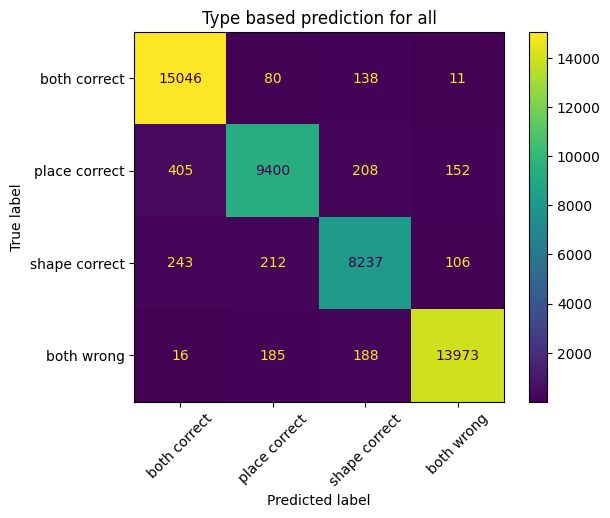

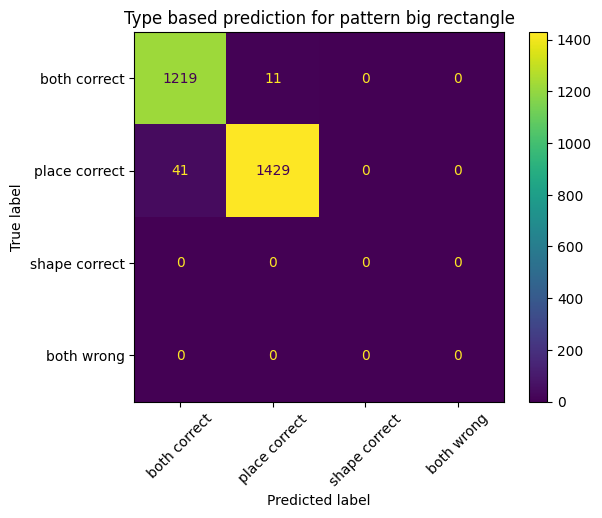

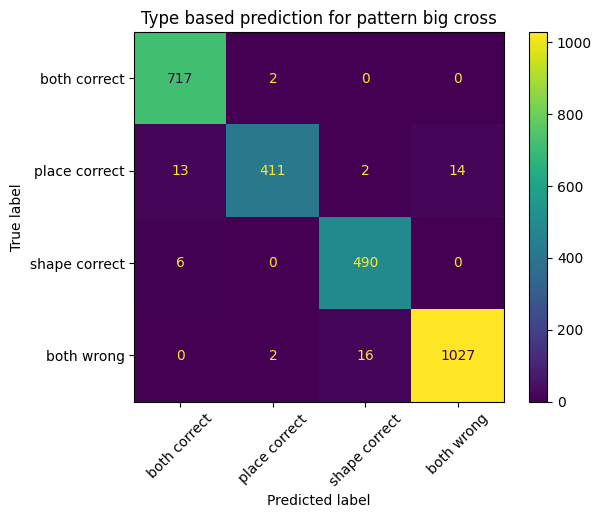

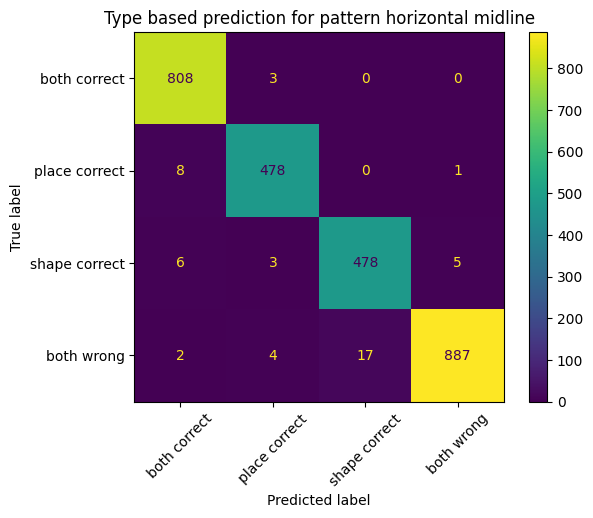

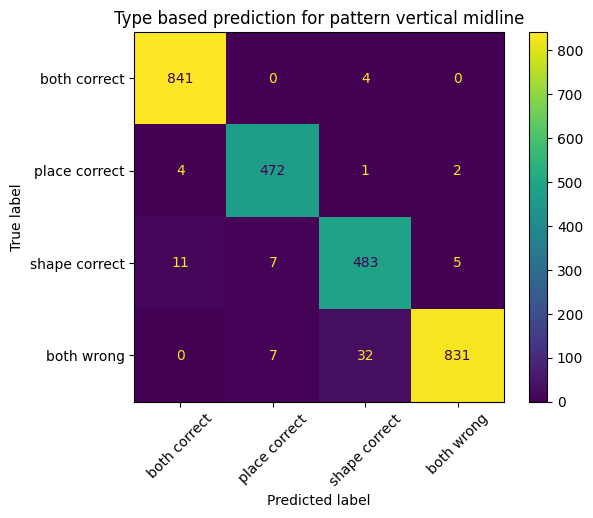

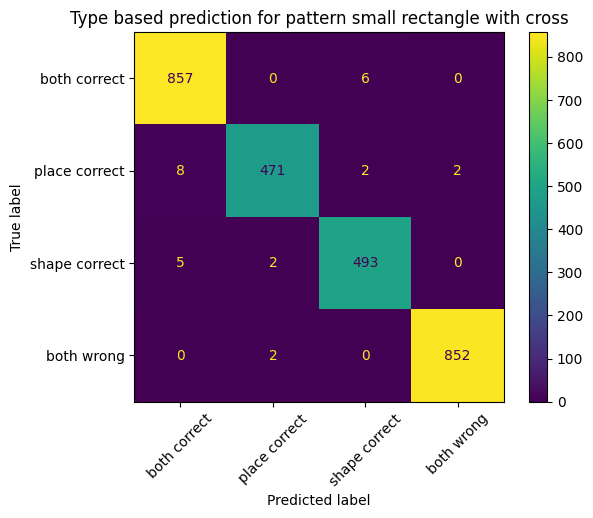

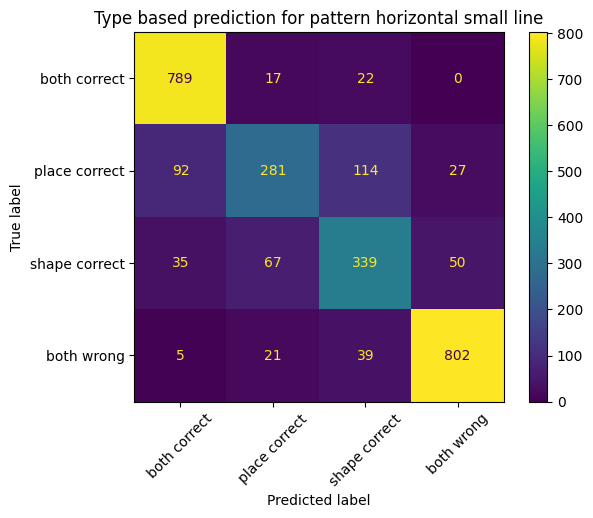

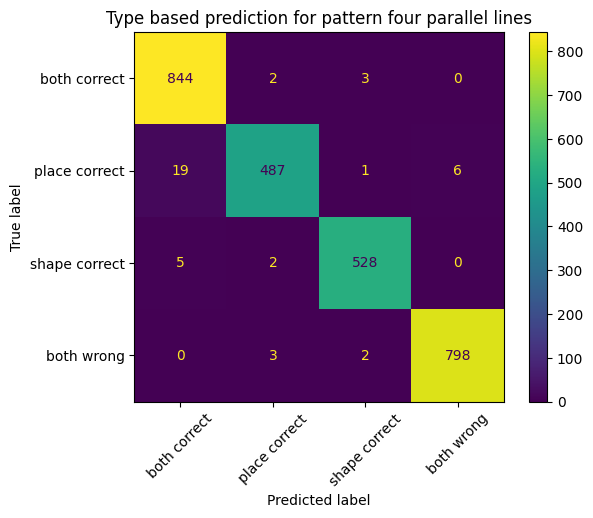

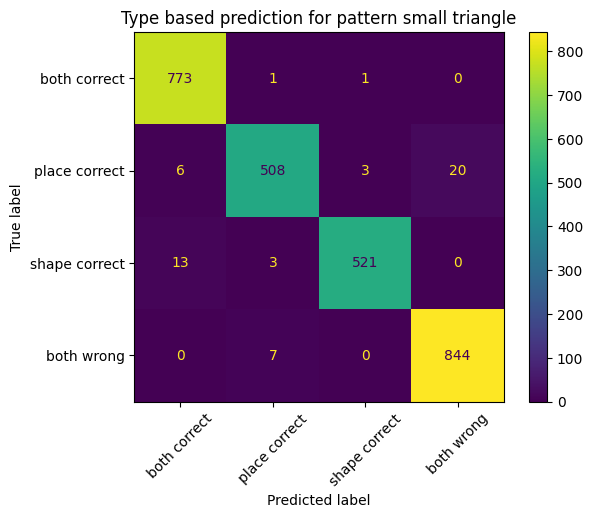

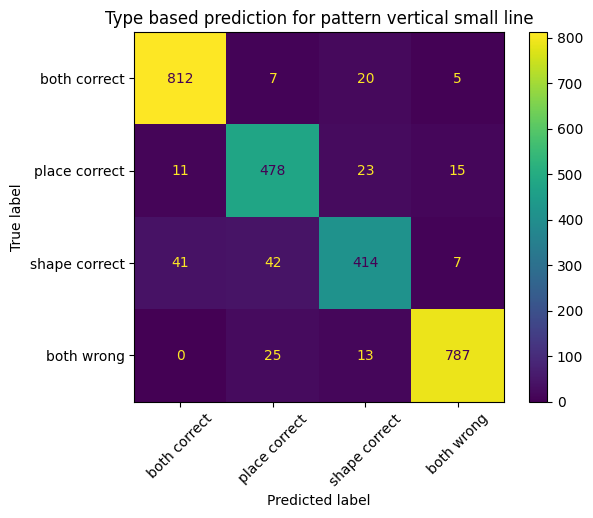

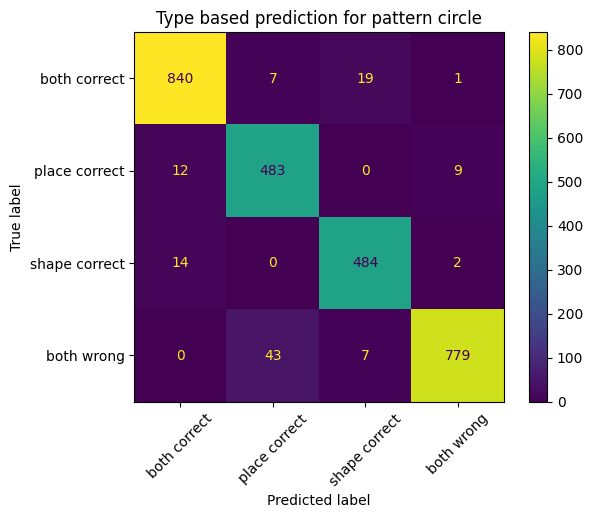

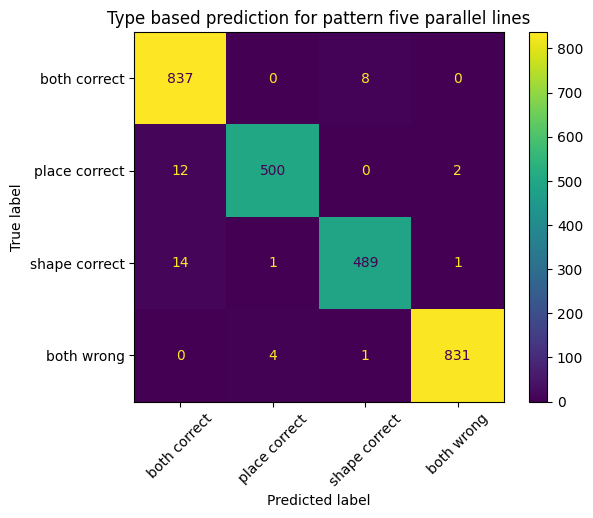

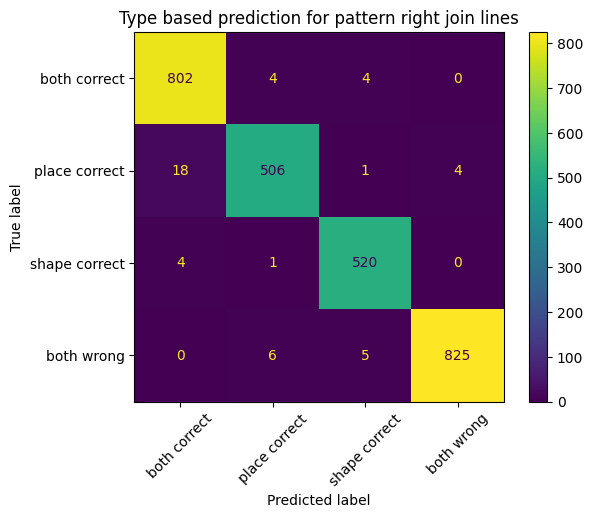

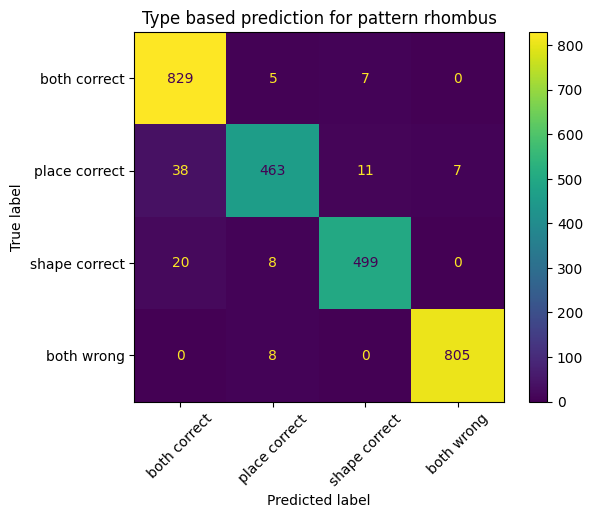

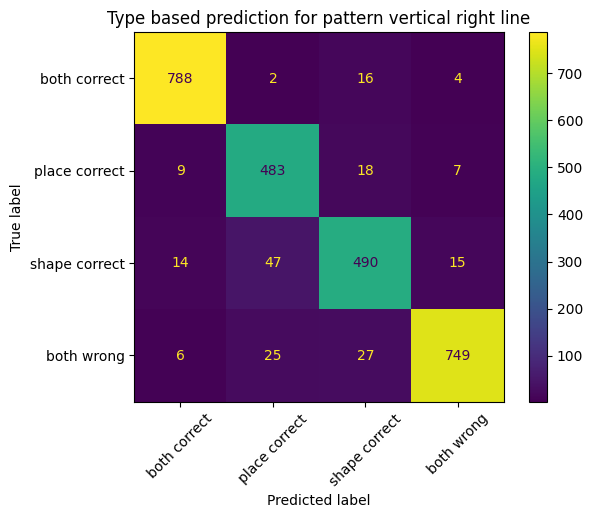

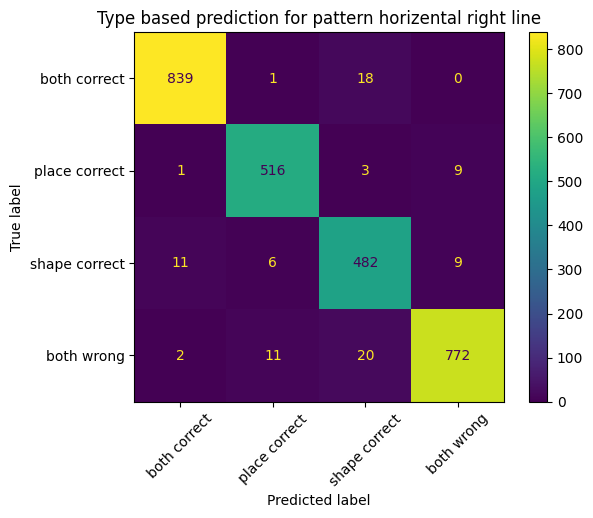

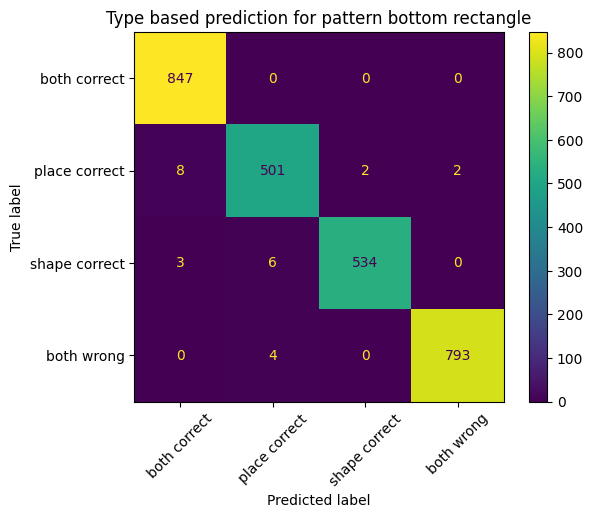

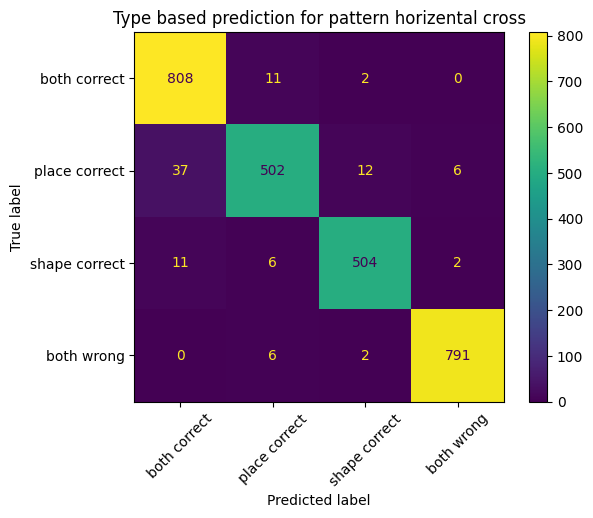

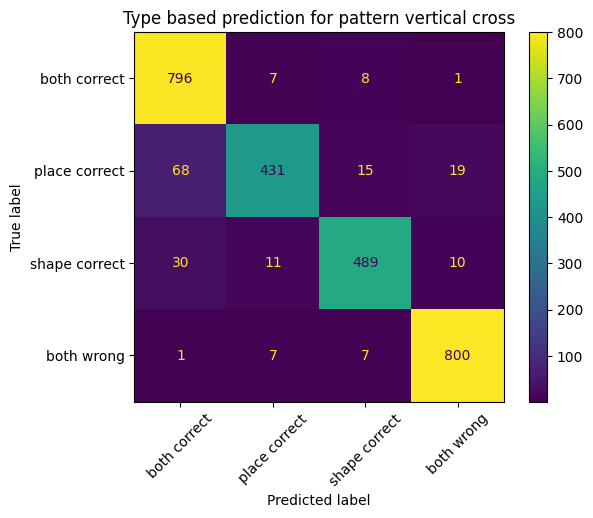

<Figure size 1440x4320 with 0 Axes>

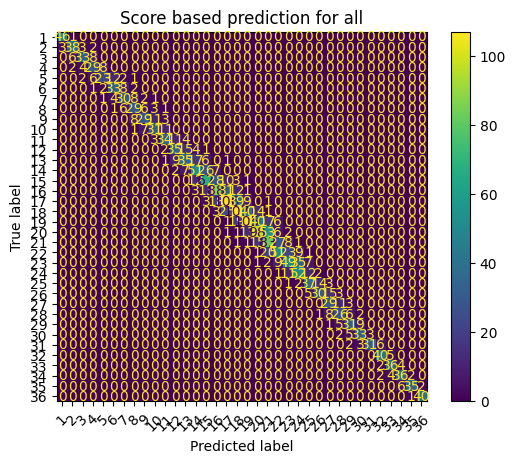

In [18]:
train_result = trainer.predict(train_ds)
print(train_result.metrics)
draw_confusion_matrix(train_result, num_pattern=NUM_PATTERN)

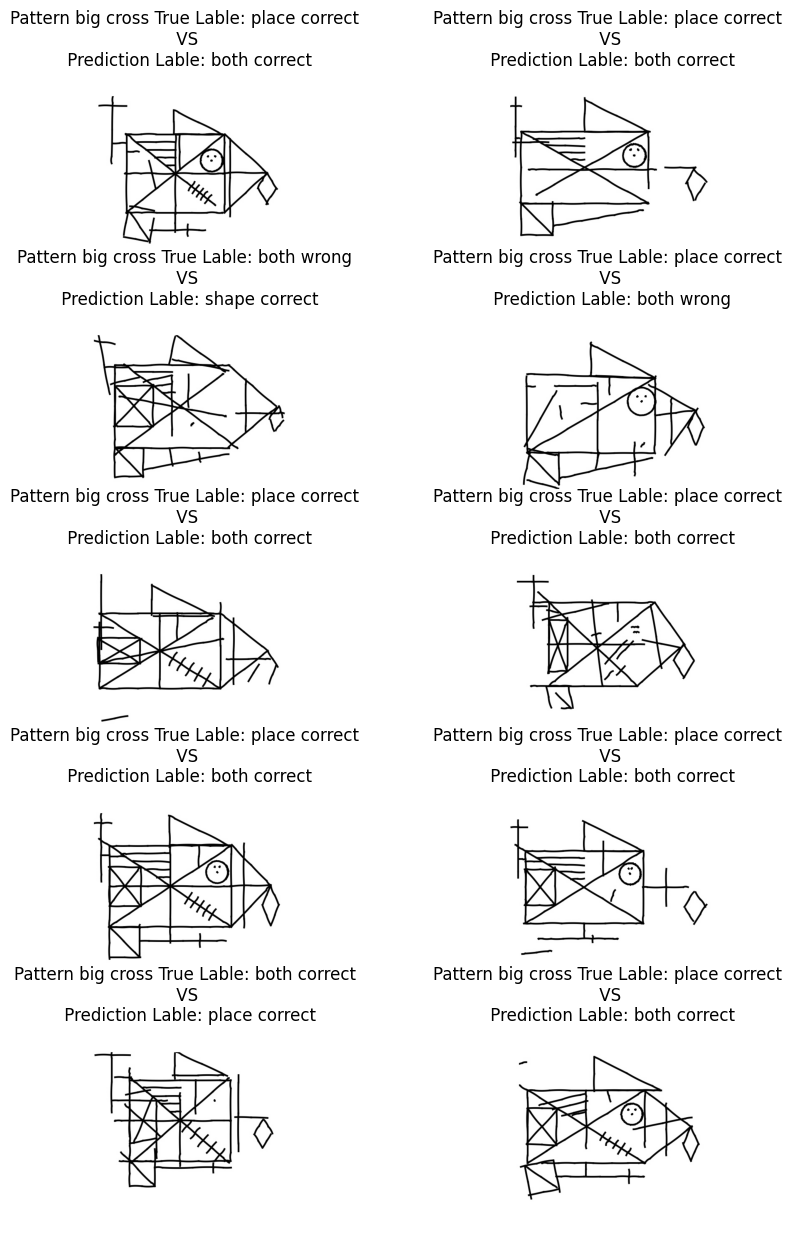

In [ ]:
show_mislabeled_image(train_result, pattern_id=2, dataset=train_ds, num_pattern=NUM_PATTERN)

##Visualizing Testing Results

{'test_loss': 14.402092933654785, 'test_accuracy': 0.9438888888888889, 'test_runtime': 100.1795, 'test_samples_per_second': 2.995, 'test_steps_per_second': 0.299}
(300, 18)
(300, 18)
Mean Absolute Error (MAE): 0.59
R-squared: 0.99
(300, 18)
(300, 18)
!!All Pattern -- place correct error rate warning: 0.10933081998114987
!!All Pattern -- shape correct error rate warning: 0.09574468085106383
!!big cross -- place correct error rate warning: 0.1111111111111111
!!horizontal midline -- shape correct error rate warning: 0.057971014492753624
!!horizontal midline -- both wrong error rate warning: 0.08247422680412371


<ipython-input-16-fc6e32ad568f>:144: RuntimeWarning: invalid value encountered in long_scalars
  sc_err_rate = (sum(confusion_matrix[2]) - confusion_matrix[2][2]) / sum(confusion_matrix[2])
<ipython-input-16-fc6e32ad568f>:147: RuntimeWarning: invalid value encountered in long_scalars
  bw_err_rate = (sum(confusion_matrix[3]) - confusion_matrix[3][3]) / sum(confusion_matrix[3])


!!vertical midline -- shape correct error rate warning: 0.1509433962264151
!!vertical midline -- both wrong error rate warning: 0.0673076923076923
!!small rectangle with cross -- place correct error rate warning: 0.125
!!horizontal small line -- both correct error rate warning: 0.06930693069306931
!!horizontal small line -- place correct error rate warning: 0.7346938775510204
!!horizontal small line -- shape correct error rate warning: 0.3695652173913043
!!horizontal small line -- both wrong error rate warning: 0.14423076923076922
!!four parallel lines -- place correct error rate warning: 0.08620689655172414
!!small triangle -- place correct error rate warning: 0.08771929824561403
!!vertical small line -- place correct error rate warning: 0.14516129032258066
!!vertical small line -- shape correct error rate warning: 0.23636363636363636
!!vertical small line -- both wrong error rate warning: 0.07954545454545454
!!circle -- both wrong error rate warning: 0.09411764705882353
!!five parall

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


the accuracy of predicting rey scores is: 0.5366666666666666


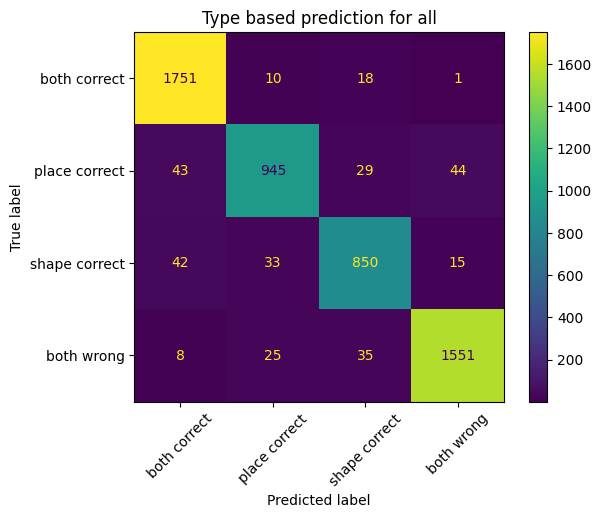

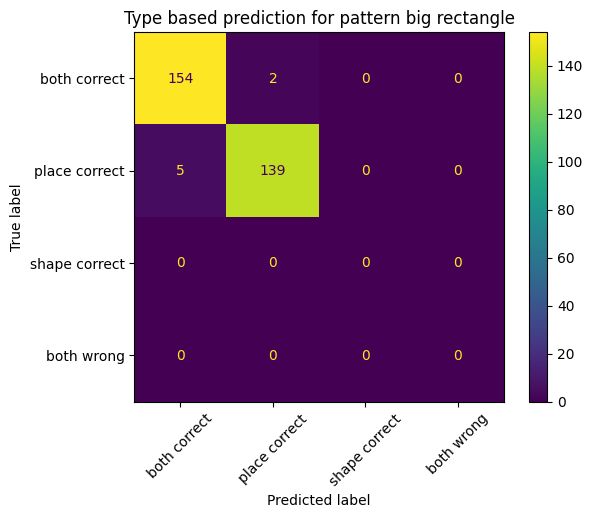

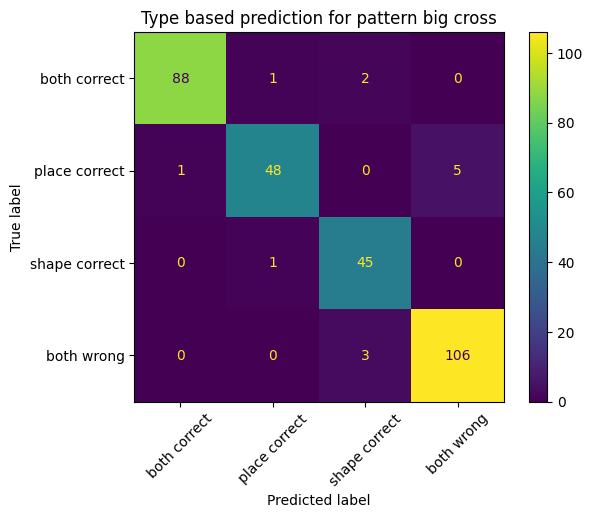

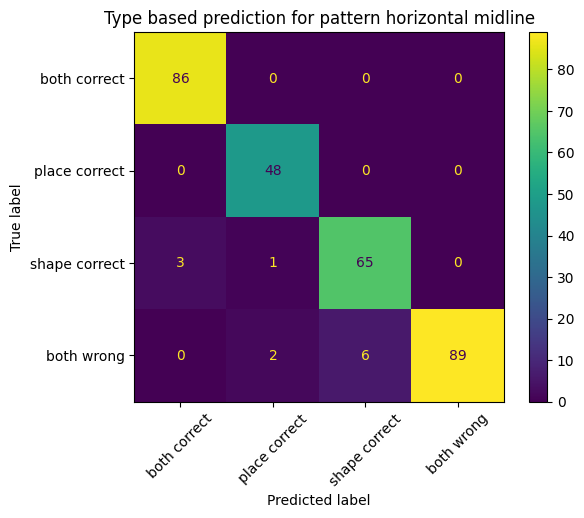

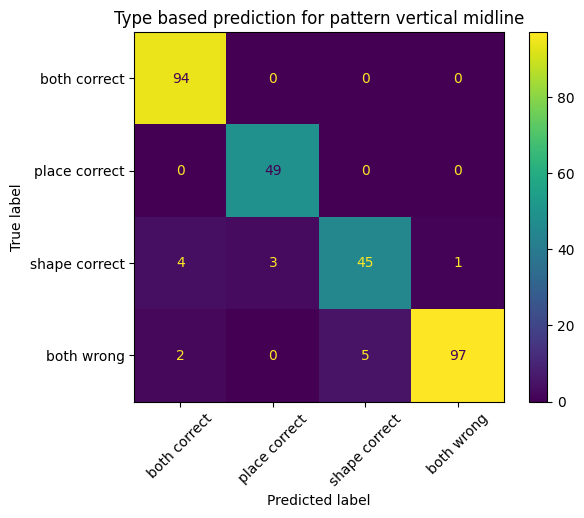

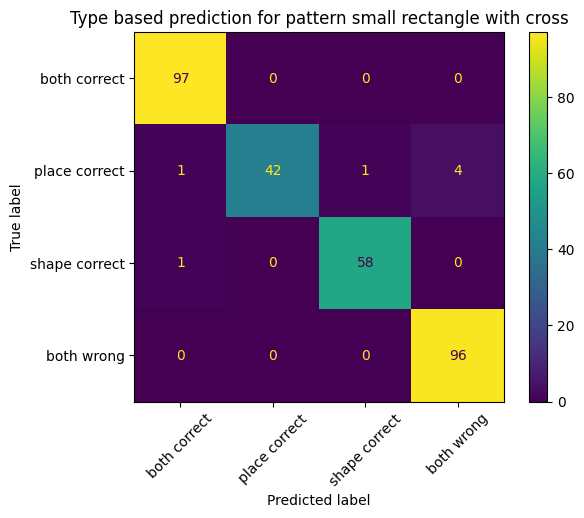

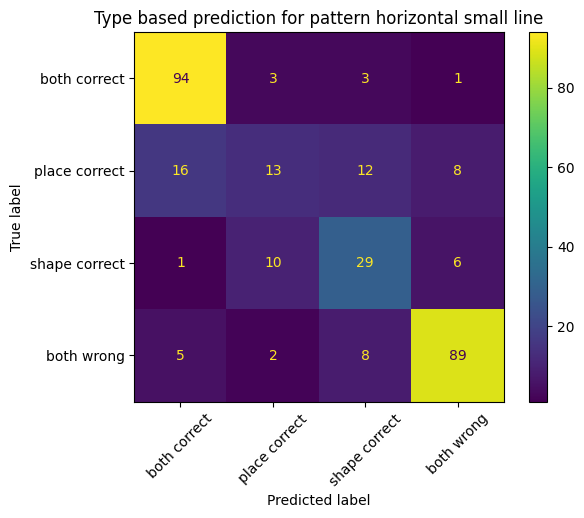

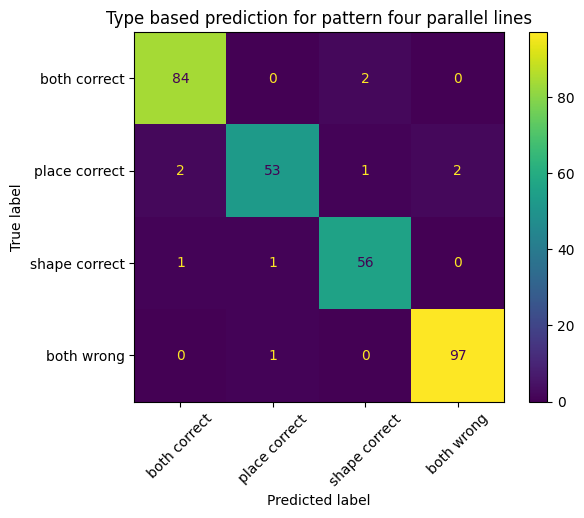

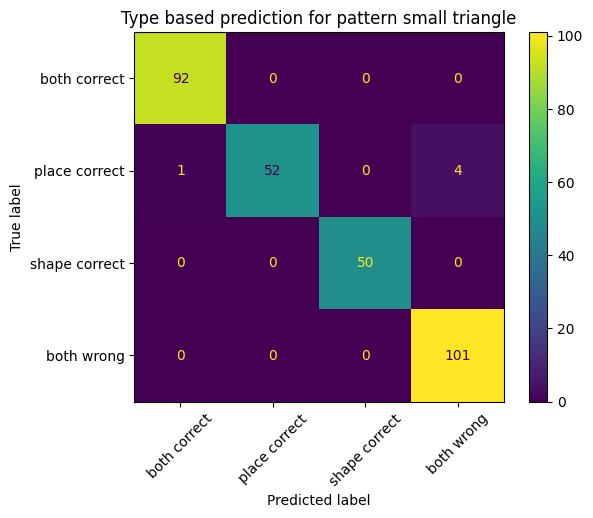

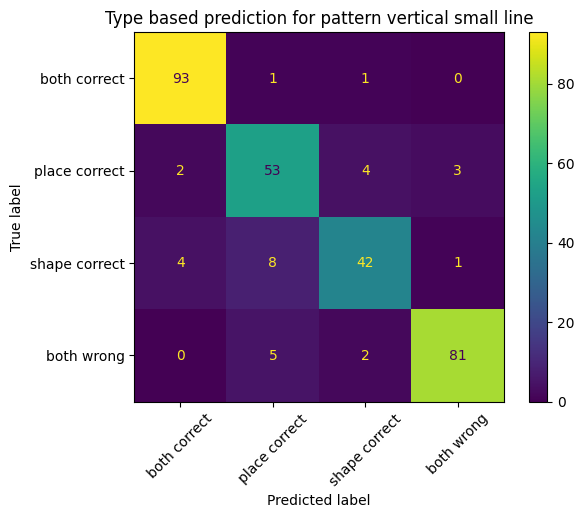

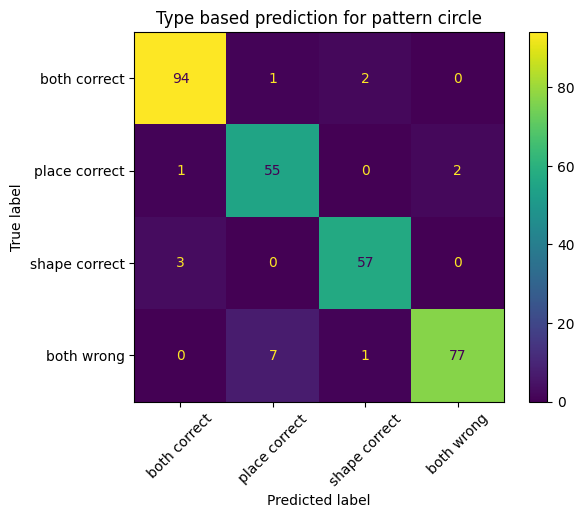

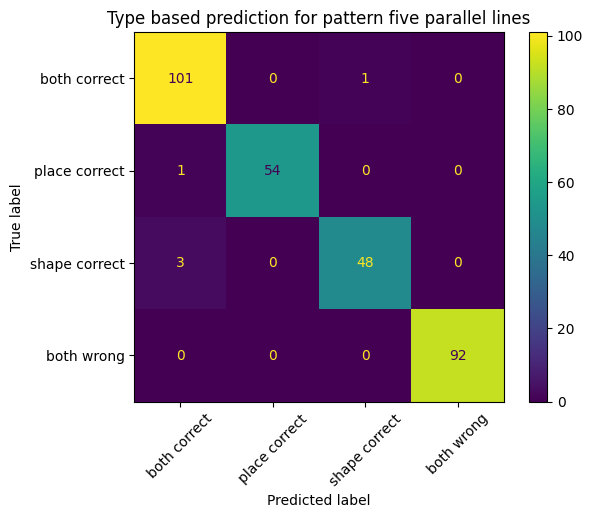

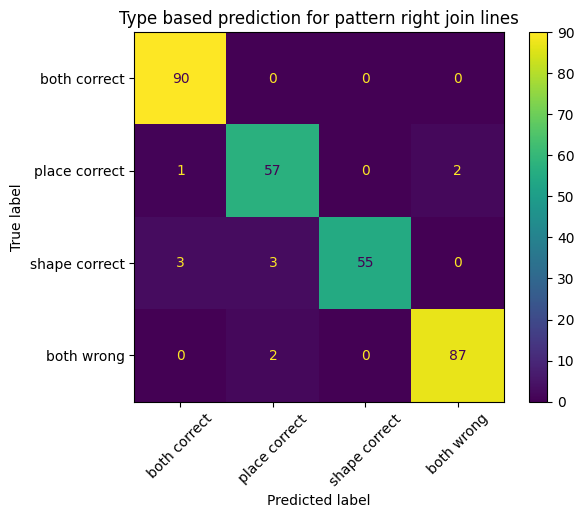

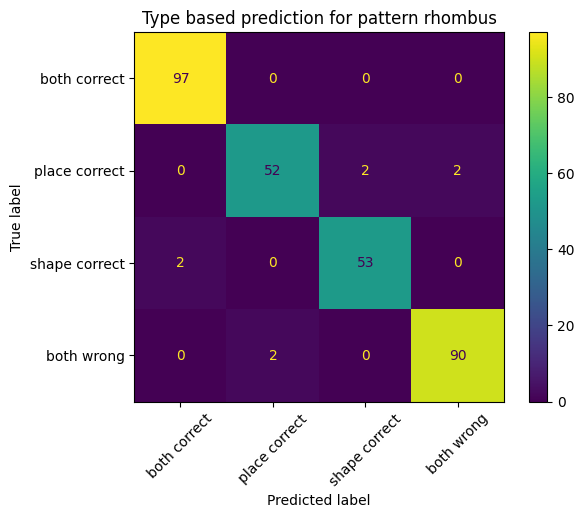

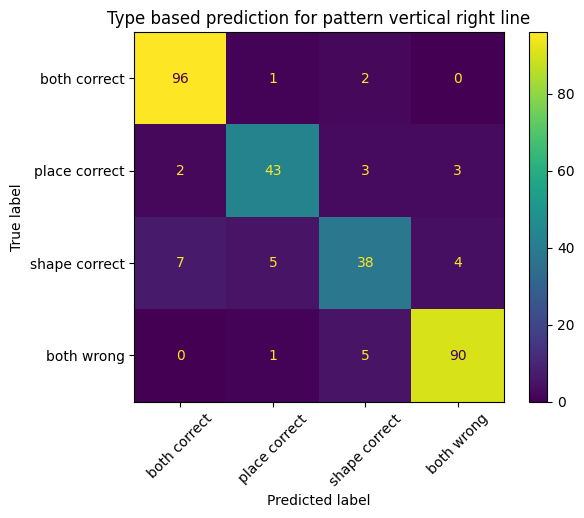

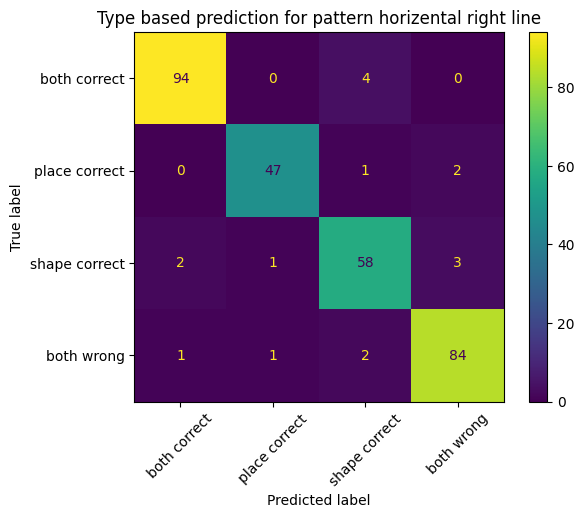

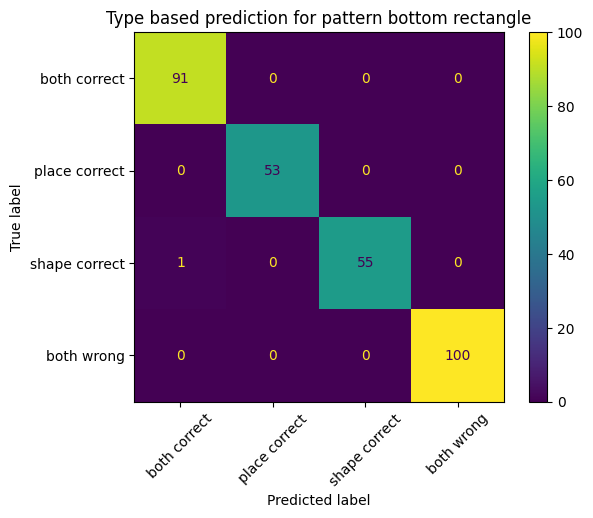

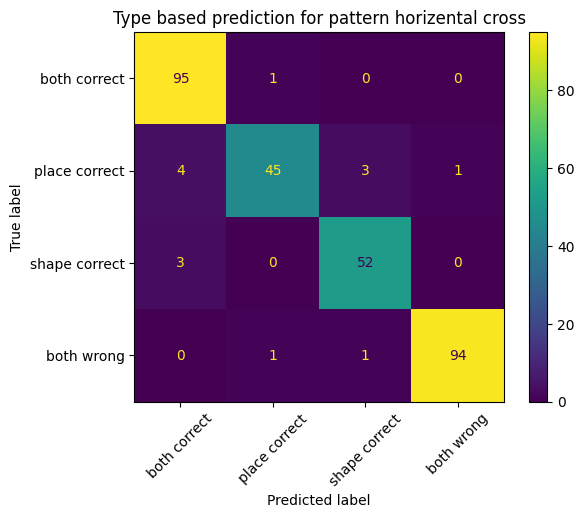

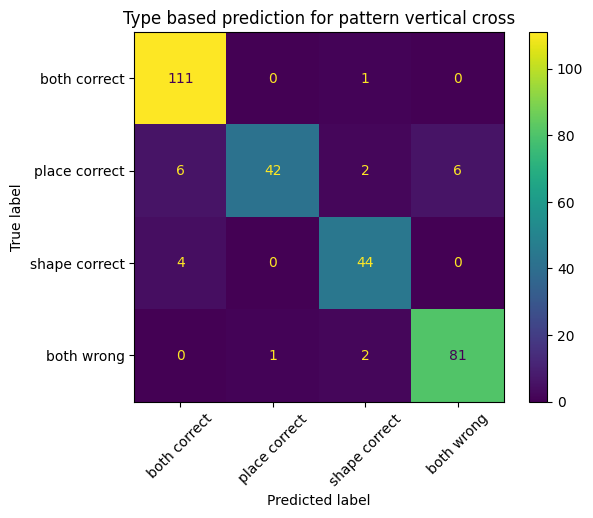

<Figure size 1440x4320 with 0 Axes>

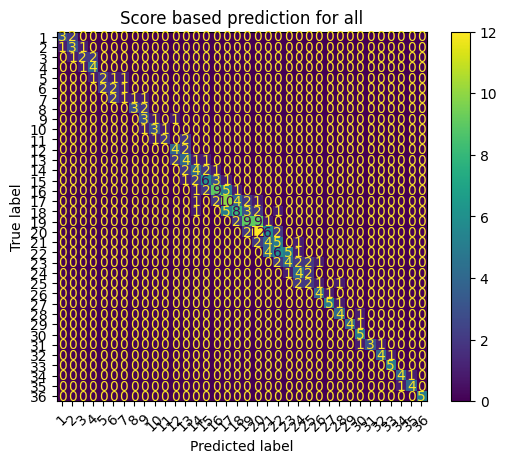

In [19]:
test_outputs = trainer.predict(test_ds)
print(test_outputs.metrics)
cal_r_mae(test_outputs, NUM_PATTERN)
draw_confusion_matrix(test_outputs, num_pattern=NUM_PATTERN)

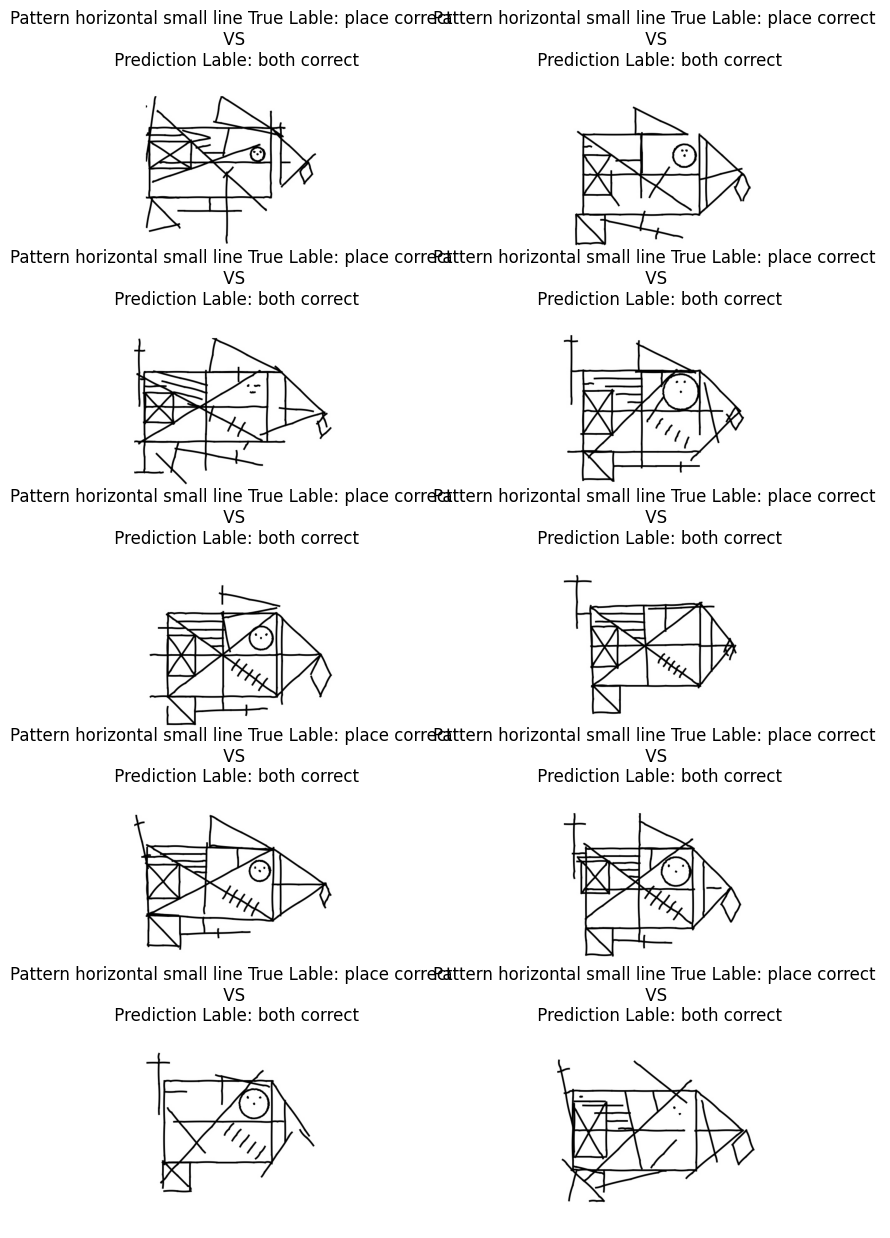

In [ ]:
show_mislabeled_image_by_type(test_outputs, pattern_id=6, dataset=test_ds, true_type= 1, pre_type=0, num = 10, num_pattern=NUM_PATTERN)

## Visualizing Hand_Drawn Testing Results

In [ ]:
handdrawing_ds = load_dataset("imagefolder", data_dir='/content/drive/MyDrive/data/handdrawn/processed', drop_metadata=False)['train']


Resolving data files:   0%|          | 0/101 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

{'test_loss': 18.512929916381836, 'test_accuracy': 0.7172222222222222, 'test_runtime': 7.4177, 'test_samples_per_second': 13.481, 'test_steps_per_second': 1.348}
(100, 18)
(100, 18)
!!All Pattern -- both correct error rate warning: 0.36185383244206776
!!All Pattern -- place correct error rate warning: 0.44542772861356933
!!All Pattern -- shape correct error rate warning: 0.5606060606060606
!!big rectangle -- both correct error rate warning: 0.3125
!!big cross -- place correct error rate warning: 0.5833333333333334


<ipython-input-23-fc6e32ad568f>:144: RuntimeWarning: invalid value encountered in long_scalars
  sc_err_rate = (sum(confusion_matrix[2]) - confusion_matrix[2][2]) / sum(confusion_matrix[2])
<ipython-input-23-fc6e32ad568f>:147: RuntimeWarning: invalid value encountered in long_scalars
  bw_err_rate = (sum(confusion_matrix[3]) - confusion_matrix[3][3]) / sum(confusion_matrix[3])


!!horizontal midline -- both correct error rate warning: 0.36666666666666664
!!horizontal midline -- place correct error rate warning: 0.4375
!!horizontal midline -- shape correct error rate warning: 0.3888888888888889
!!vertical midline -- place correct error rate warning: 0.6842105263157895
!!vertical midline -- shape correct error rate warning: 0.3333333333333333
!!small rectangle with cross -- both correct error rate warning: 0.40625
!!small rectangle with cross -- shape correct error rate warning: 0.35714285714285715
!!horizontal small line -- both correct error rate warning: 0.3
!!horizontal small line -- place correct error rate warning: 0.9375
!!horizontal small line -- shape correct error rate warning: 0.6363636363636364
!!four parallel lines -- both correct error rate warning: 0.4230769230769231
!!four parallel lines -- place correct error rate warning: 0.782608695652174
!!four parallel lines -- shape correct error rate warning: 0.3333333333333333
!!small triangle -- both cor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


the accuracy of predicting rey scores is: 0.11
(100, 18)
(100, 18)
Mean Absolute Error (MAE): 3.28
R-squared: 0.80


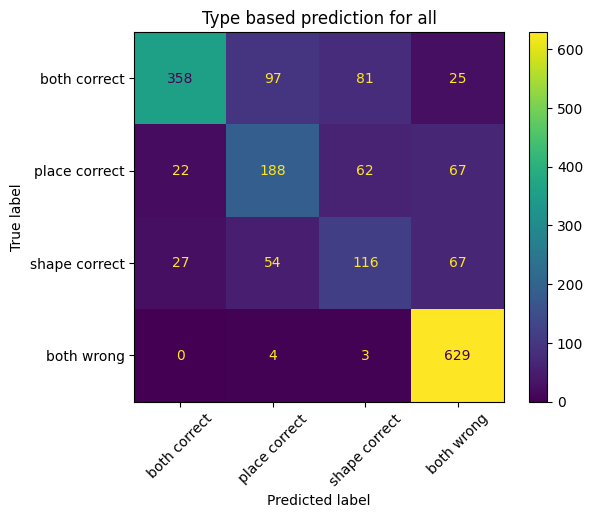

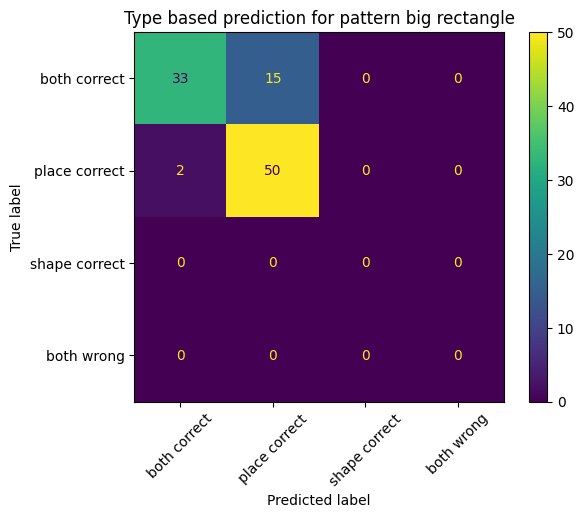

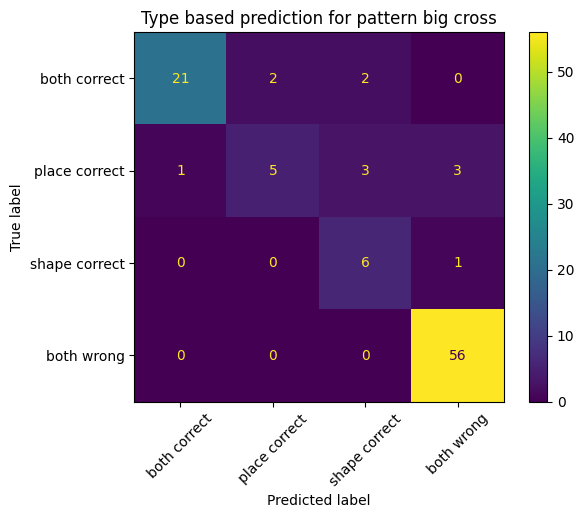

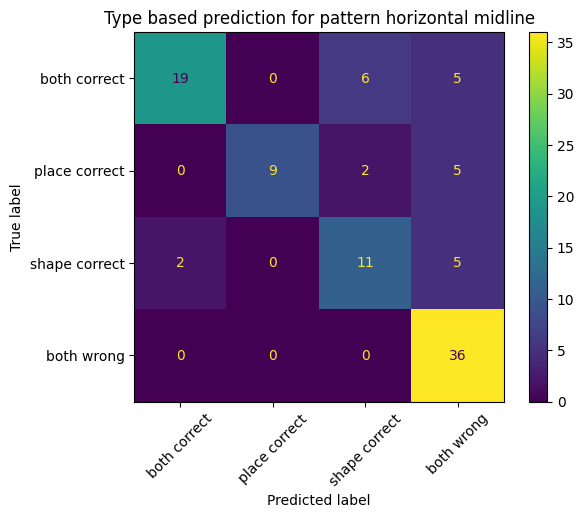

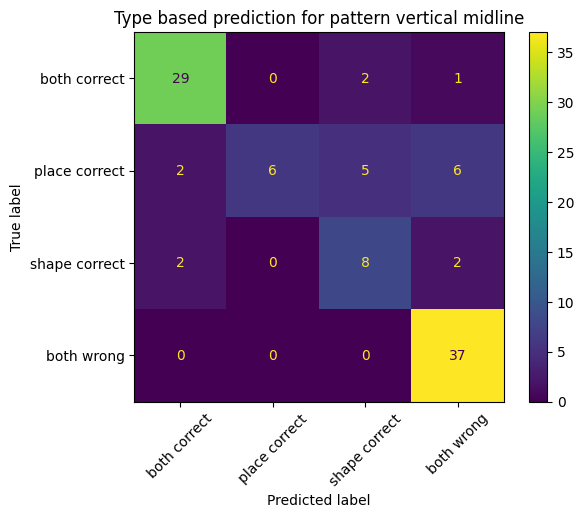

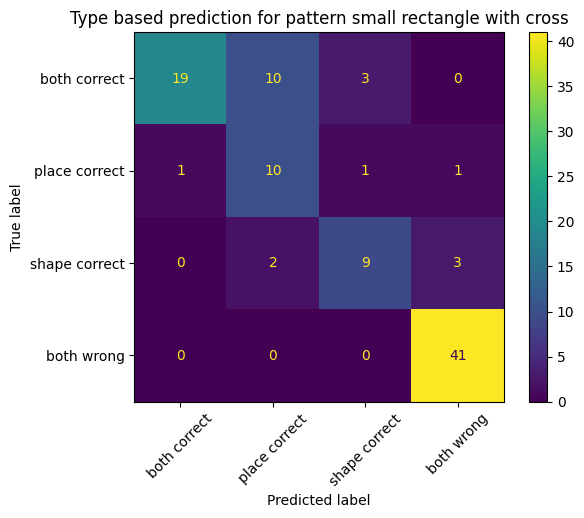

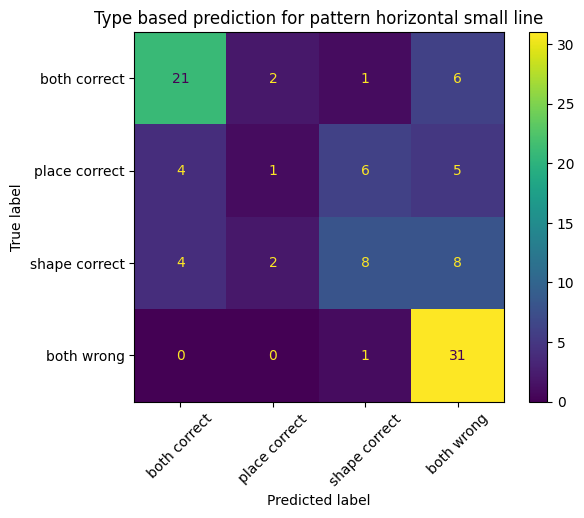

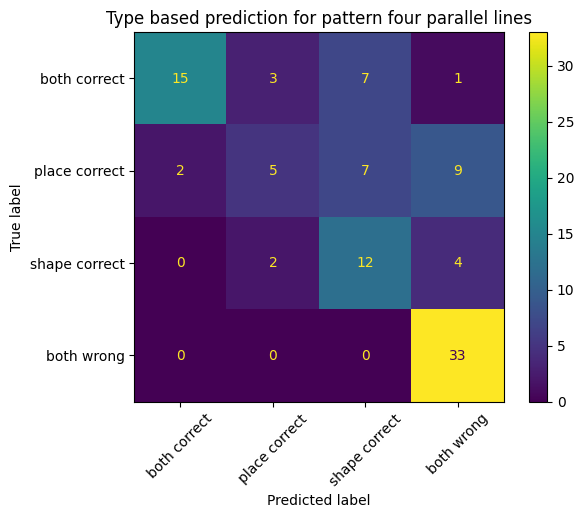

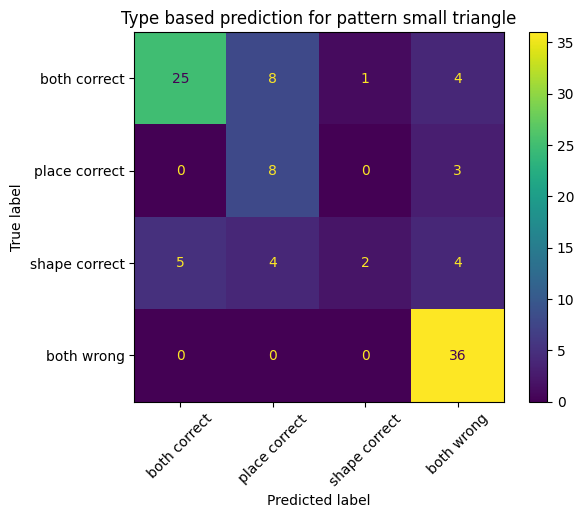

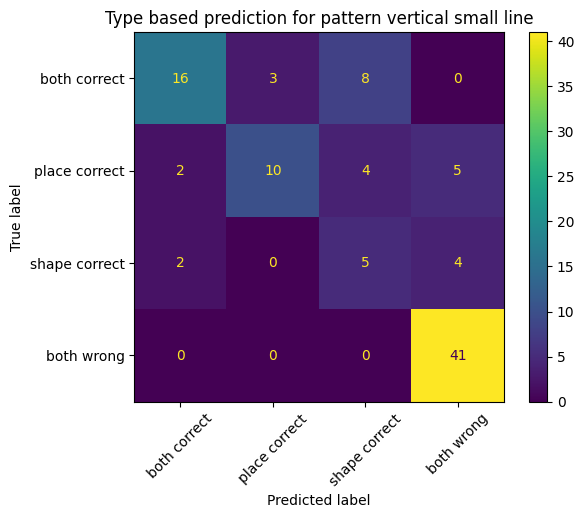

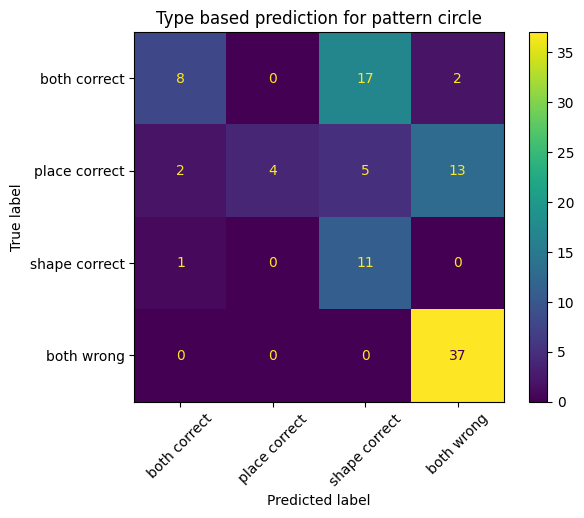

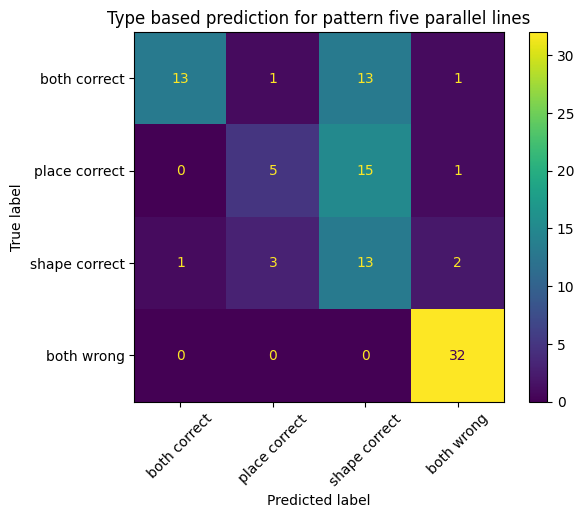

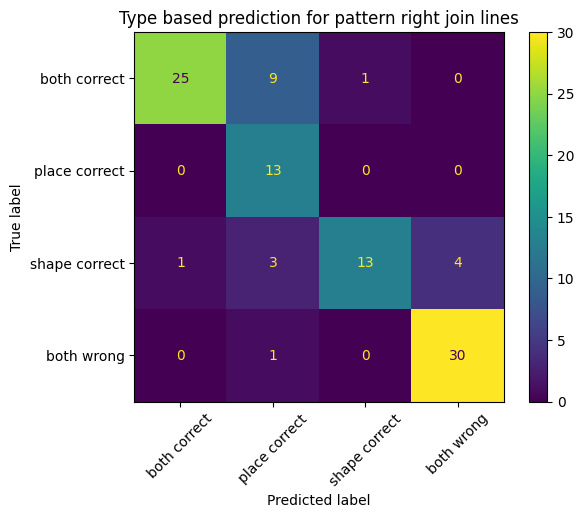

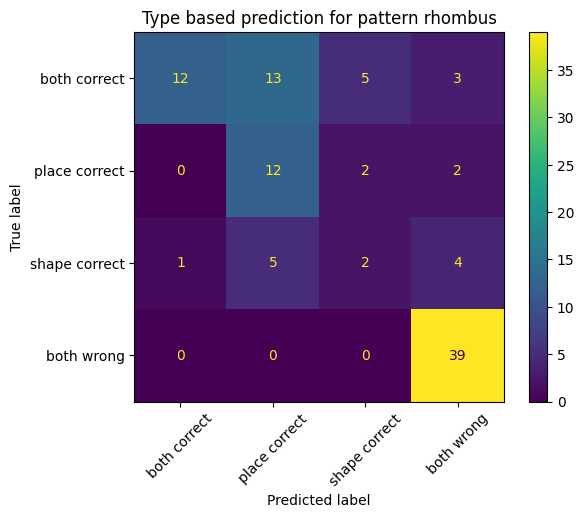

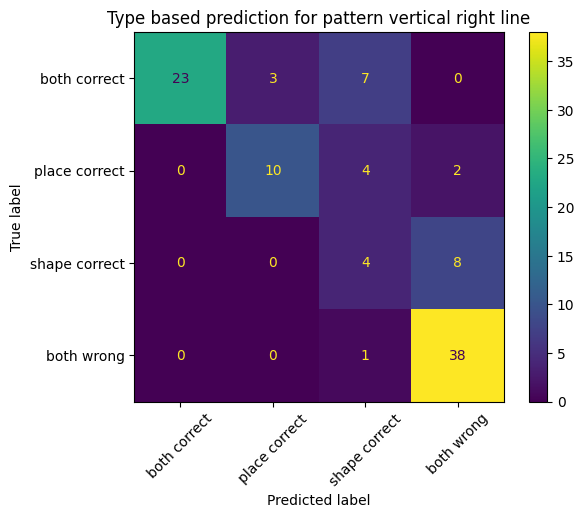

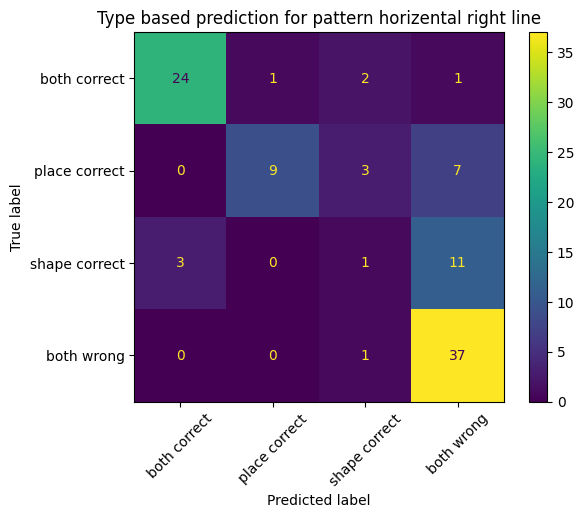

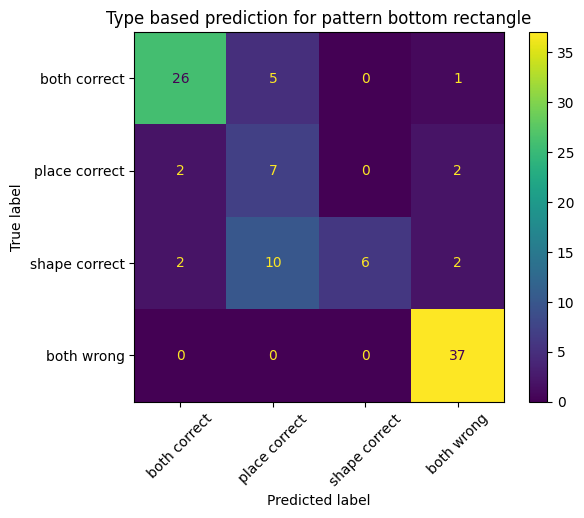

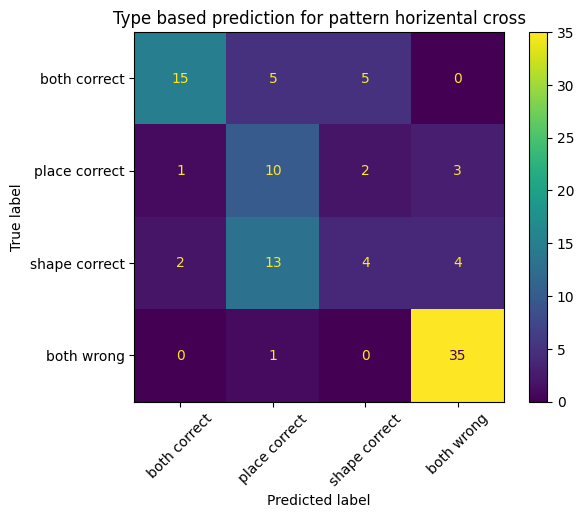

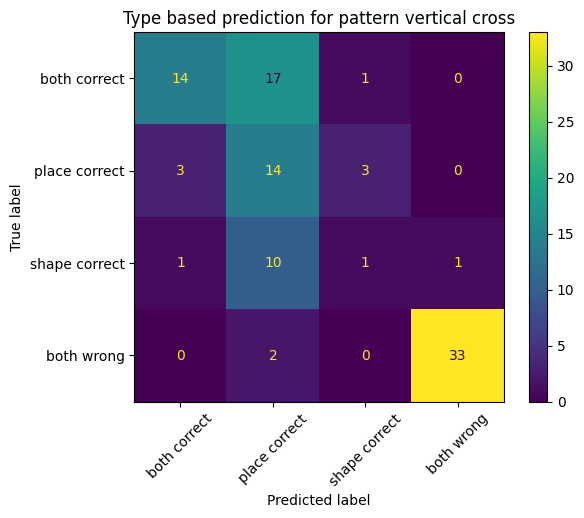

<Figure size 1440x4320 with 0 Axes>

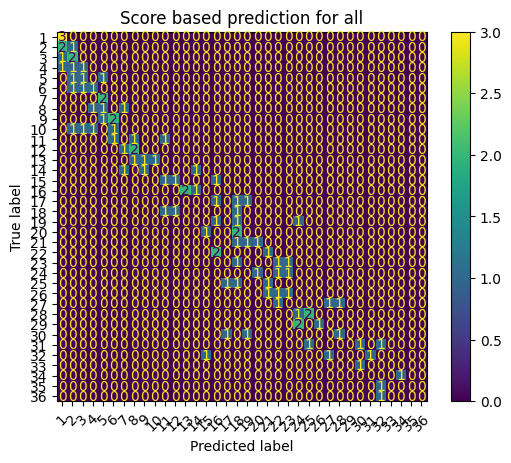

In [ ]:
handdrawing_ds.set_transform(val_transforms)
hd_outputs = trainer.predict(handdrawing_ds)
print(hd_outputs.metrics)
draw_confusion_matrix(hd_outputs, num_pattern=NUM_PATTERN)
cal_r_mae(hd_outputs, NUM_PATTERN)


In [ ]:
show_correct_labeled_image(hd_outputs, pattern_id=1, dataset=handdrawing_ds, num_pattern=NUM_PATTERN)

In [ ]:
show_mislabeled_image(hd_outputs, pattern_id=1, dataset=handdrawing_ds, num_pattern=NUM_PATTERN)

#Fine tunning with Hand drawn images

### Load the fine-tuned model and hand-drawn dataset

In [20]:
hd_ds = load_dataset("imagefolder", data_dir='/content/drive/MyDrive/data/handdrawn/processed', drop_metadata=False)['train']
splits = hd_ds.train_test_split(test_size=0.5)
hd_train_ds = splits['train']
hd_val_ds = splits['test']
splits = hd_val_ds.train_test_split(test_size=0.5)
hd_val_ds = splits['train']
hd_test_ds = splits['test']
hd_train_ds.shape
hd_train_ds.set_transform(train_transforms)
hd_val_ds.set_transform(val_transforms)
hd_test_ds.set_transform(val_transforms)


Resolving data files:   0%|          | 0/101 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [26]:
num_epochs = 20
batch_size = 5

args = TrainingArguments(
    f"handdrawn/",
    save_strategy="epoch",
    evaluation_strategy="epoch",
    learning_rate=2e-4,
    lr_scheduler_type = "cosine",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.2,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_dir='logs',
    remove_unused_columns=False,
    save_total_limit=2,
)
trainer = Trainer(
    model,
    args,
    train_dataset=hd_train_ds,
    eval_dataset=hd_val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    # preprocess_logits_for_metrics=preprocess_logits_for_metrics,
    tokenizer=processor,
)
trainer.train()

TrainOutput(global_step=200, training_loss=15.02602783203125, metrics={'train_runtime': 106.5919, 'train_samples_per_second': 9.382, 'train_steps_per_second': 1.876, 'total_flos': 0.0, 'train_loss': 15.02602783203125, 'epoch': 20.0})

{'test_loss': 14.009454727172852, 'test_accuracy': 0.9755555555555555, 'test_runtime': 1.7708, 'test_samples_per_second': 28.236, 'test_steps_per_second': 5.647}
(50, 18)
(50, 18)
Mean Absolute Error (MAE): 0.44
R-squared: 0.99
(50, 18)
(50, 18)
!!All Pattern -- place correct error rate warning: 0.0546448087431694
!!All Pattern -- shape correct error rate warning: 0.0661764705882353
!!horizontal midline -- place correct error rate warning: 0.1111111111111111


<ipython-input-23-fc6e32ad568f>:144: RuntimeWarning: invalid value encountered in long_scalars
  sc_err_rate = (sum(confusion_matrix[2]) - confusion_matrix[2][2]) / sum(confusion_matrix[2])
<ipython-input-23-fc6e32ad568f>:147: RuntimeWarning: invalid value encountered in long_scalars
  bw_err_rate = (sum(confusion_matrix[3]) - confusion_matrix[3][3]) / sum(confusion_matrix[3])


!!vertical midline -- shape correct error rate warning: 0.3333333333333333
!!small rectangle with cross -- place correct error rate warning: 0.8
!!small rectangle with cross -- shape correct error rate warning: 0.3333333333333333
!!four parallel lines -- both correct error rate warning: 0.09090909090909091
!!four parallel lines -- shape correct error rate warning: 0.14285714285714285
!!vertical small line -- both correct error rate warning: 0.1111111111111111
!!five parallel lines -- place correct error rate warning: 0.14285714285714285
!!rhombus -- both correct error rate warning: 0.05555555555555555
!!rhombus -- place correct error rate warning: 0.14285714285714285
!!vertical right line -- shape correct error rate warning: 0.8
!!horizental right line -- place correct error rate warning: 0.09090909090909091
!!bottom rectangle -- place correct error rate warning: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


the accuracy of predicting rey scores is: 0.64


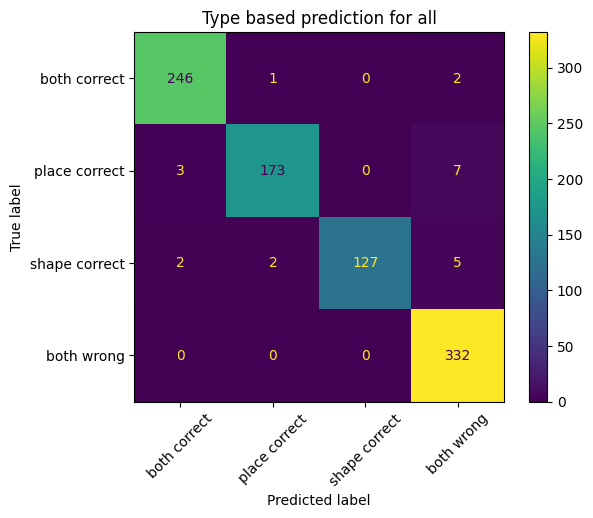

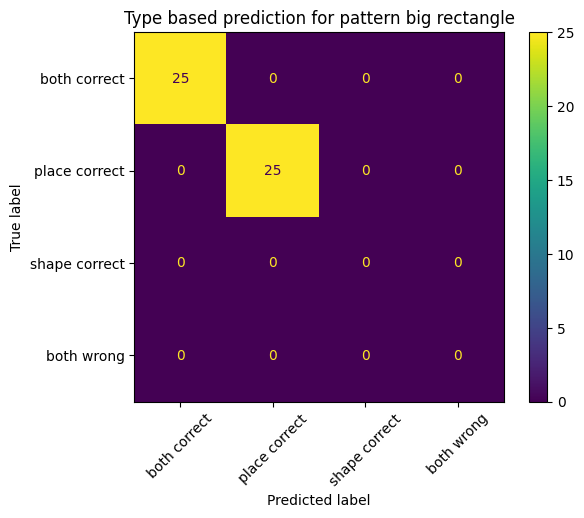

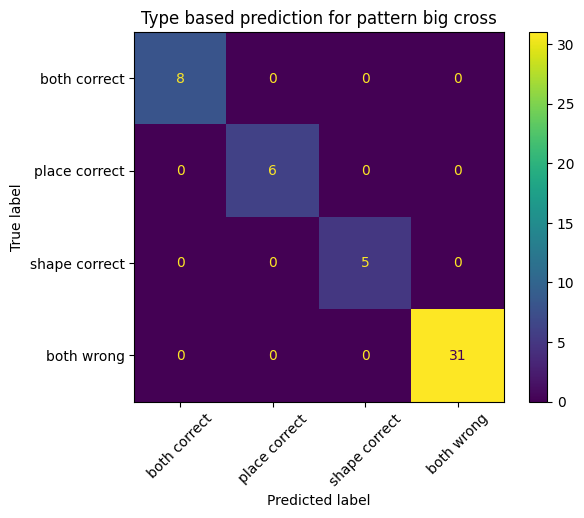

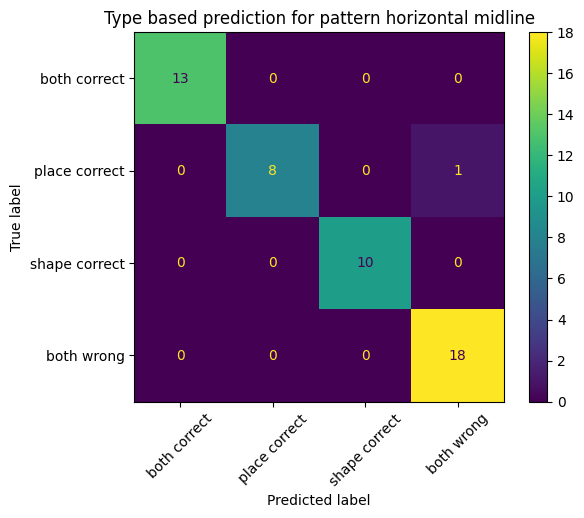

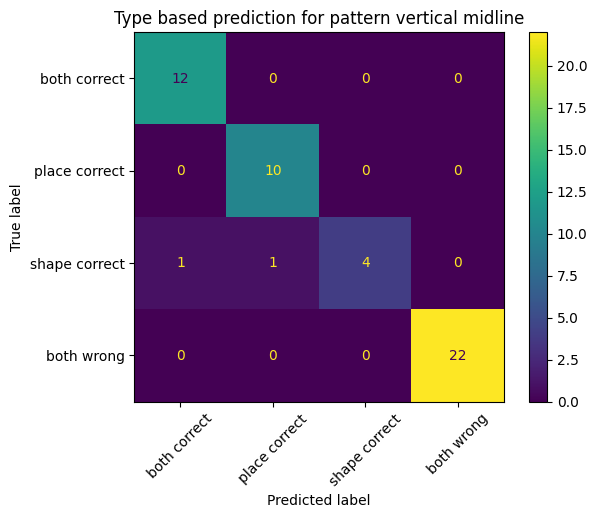

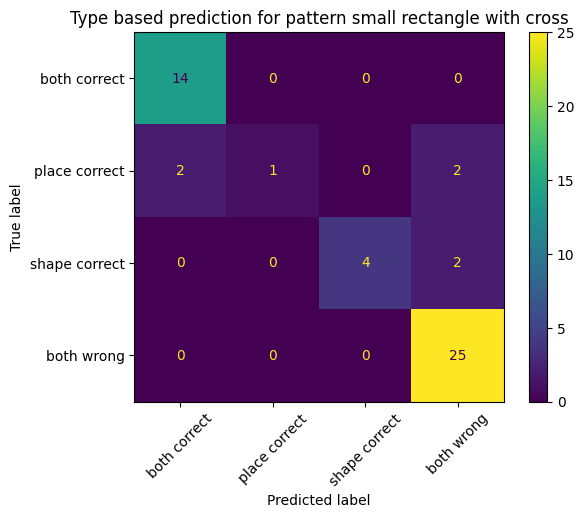

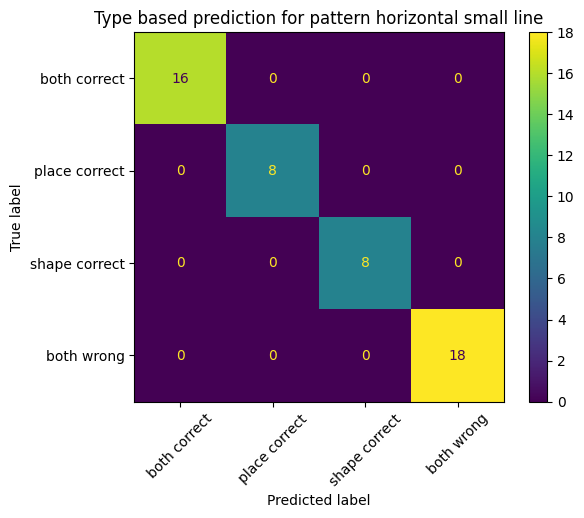

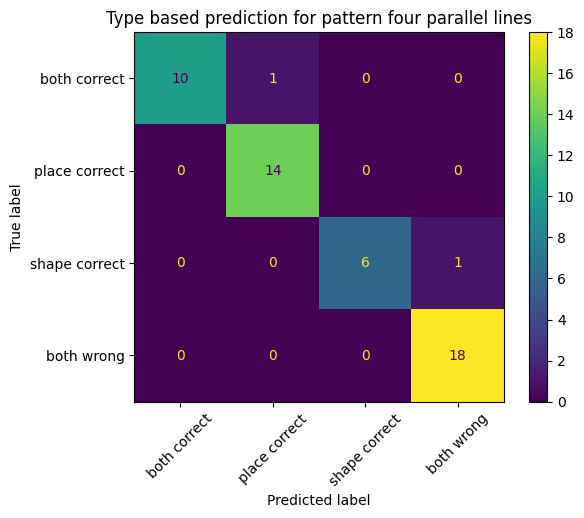

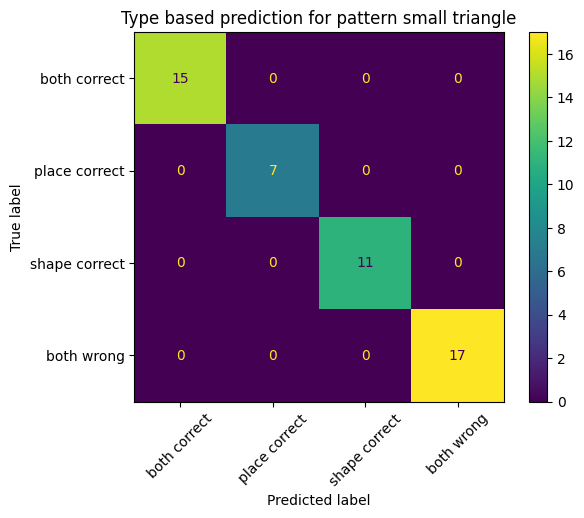

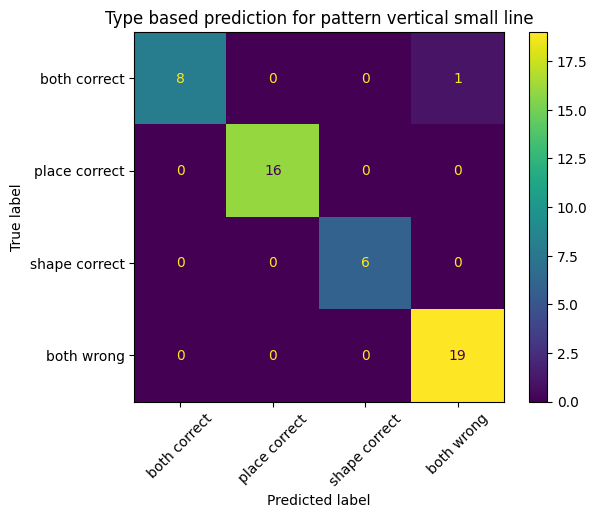

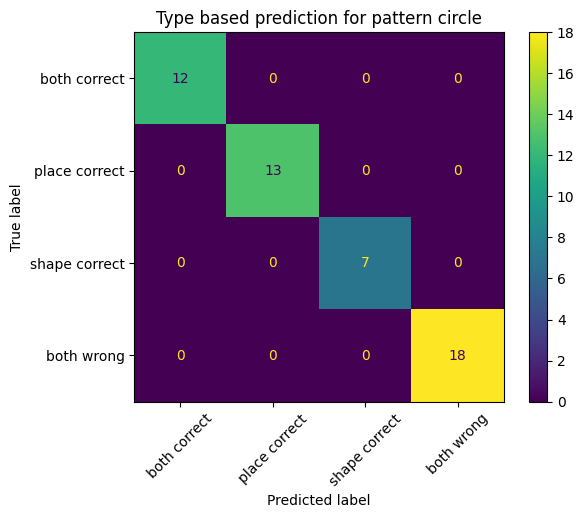

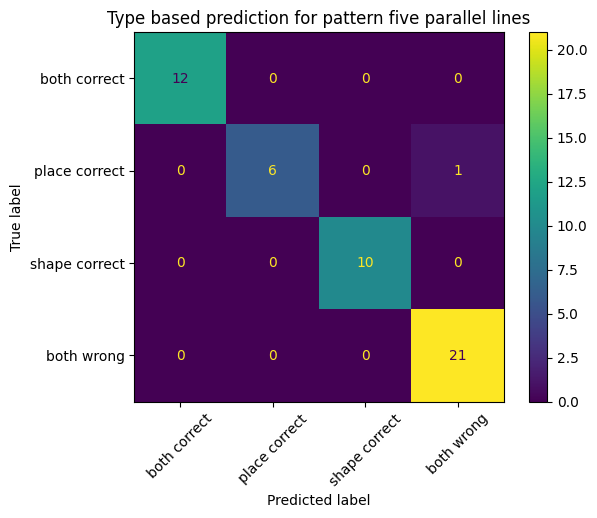

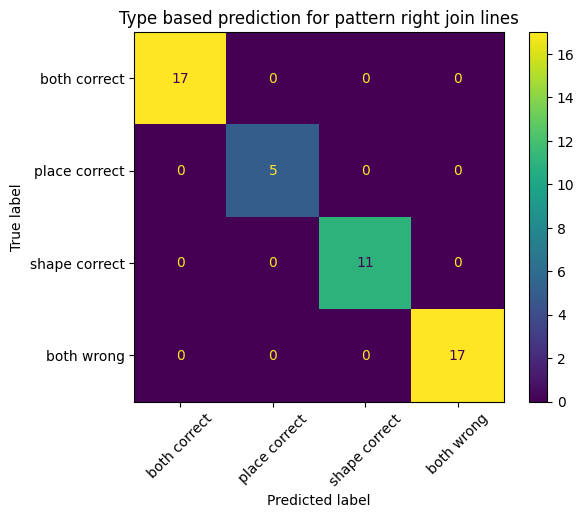

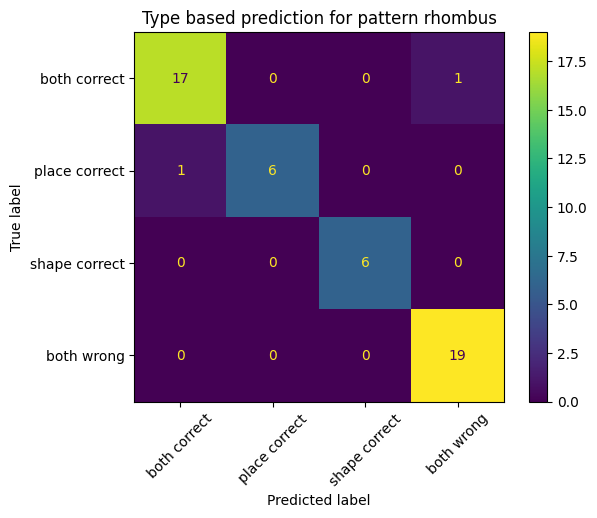

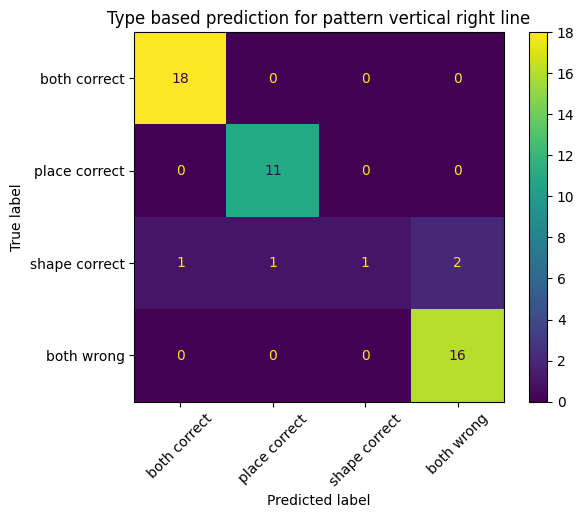

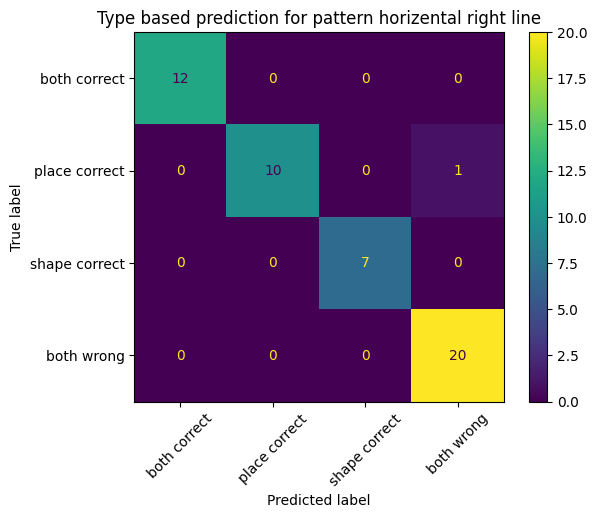

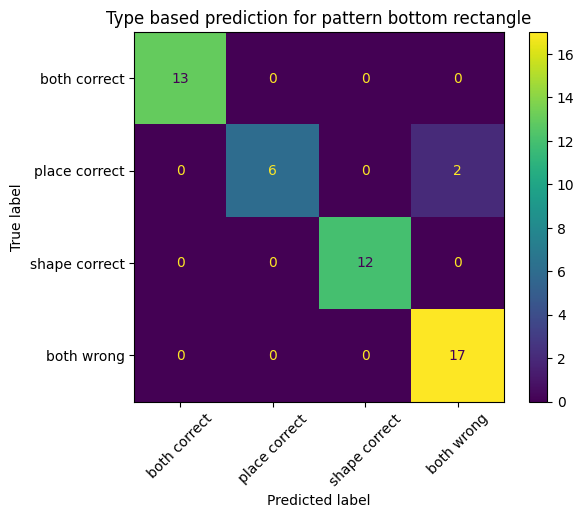

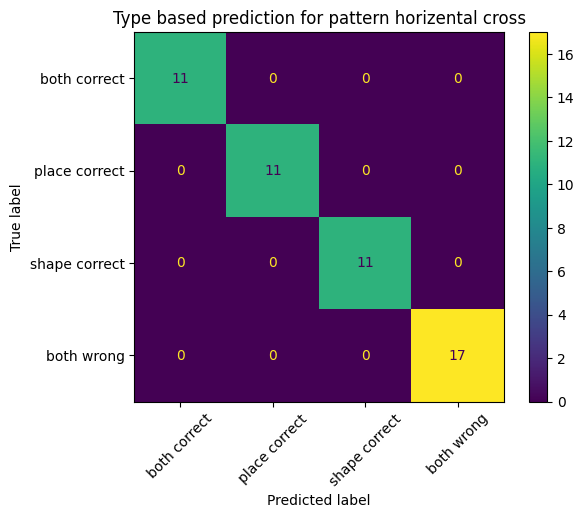

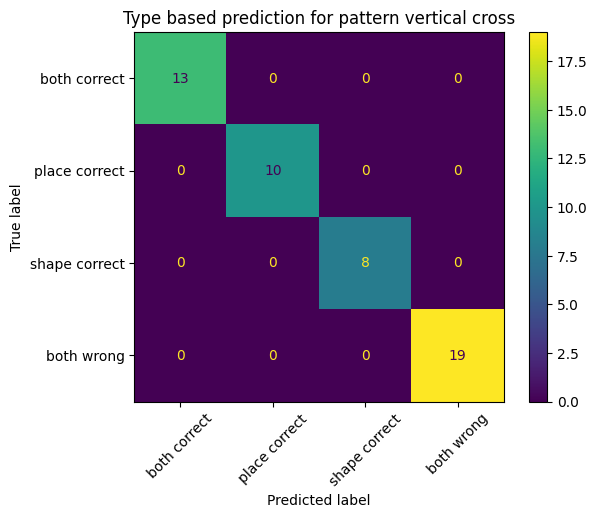

<Figure size 1440x4320 with 0 Axes>

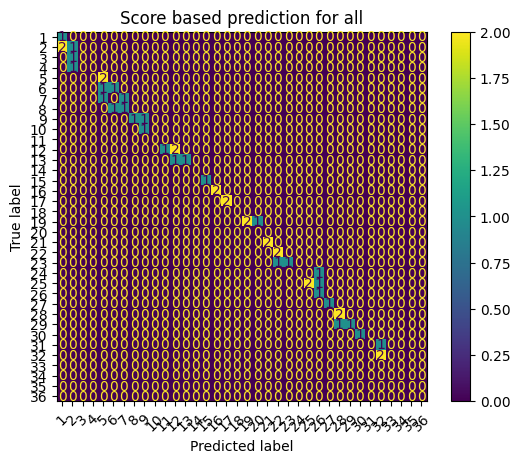

In [ ]:
hd_train_result = trainer.predict(hd_train_ds)
print(hd_train_result.metrics)
cal_r_mae(hd_train_result, NUM_PATTERN)
draw_confusion_matrix(hd_train_result, num_pattern=NUM_PATTERN)

## Visualizing Hand_Drawn Testing Results After Finetuning

{'test_loss': 16.881929397583008, 'test_accuracy': 0.8066666666666666, 'test_runtime': 0.8721, 'test_samples_per_second': 28.668, 'test_steps_per_second': 5.734}
(25, 18)
(25, 18)
Mean Absolute Error (MAE): 1.20
R-squared: 0.98
(25, 18)
(25, 18)
!!All Pattern -- place correct error rate warning: 0.3103448275862069
!!All Pattern -- shape correct error rate warning: 0.5652173913043478
!!big rectangle -- both correct error rate warning: 0.21428571428571427
!!big cross -- place correct error rate warning: 0.25
!!horizontal midline -- place correct error rate warning: 0.5
!!horizontal midline -- shape correct error rate warning: 0.3333333333333333
!!vertical midline -- place correct error rate warning: 0.2
!!vertical midline -- shape correct error rate warning: 0.25


<ipython-input-16-fc6e32ad568f>:144: RuntimeWarning: invalid value encountered in long_scalars
  sc_err_rate = (sum(confusion_matrix[2]) - confusion_matrix[2][2]) / sum(confusion_matrix[2])
<ipython-input-16-fc6e32ad568f>:147: RuntimeWarning: invalid value encountered in long_scalars
  bw_err_rate = (sum(confusion_matrix[3]) - confusion_matrix[3][3]) / sum(confusion_matrix[3])


!!small rectangle with cross -- place correct error rate warning: 0.42857142857142855
!!small rectangle with cross -- shape correct error rate warning: 0.3333333333333333
!!horizontal small line -- place correct error rate warning: 0.5
!!horizontal small line -- shape correct error rate warning: 0.8571428571428571
!!four parallel lines -- shape correct error rate warning: 0.8
!!small triangle -- shape correct error rate warning: 1.0
!!vertical small line -- both correct error rate warning: 0.2222222222222222
!!vertical small line -- place correct error rate warning: 0.3333333333333333
!!vertical small line -- shape correct error rate warning: 1.0
!!circle -- shape correct error rate warning: 0.5
!!five parallel lines -- both correct error rate warning: 0.2857142857142857
!!five parallel lines -- place correct error rate warning: 0.7142857142857143
!!right join lines -- place correct error rate warning: 0.5
!!right join lines -- shape correct error rate warning: 0.4
!!rhombus -- place c

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


the accuracy of predicting rey scores is: 0.12


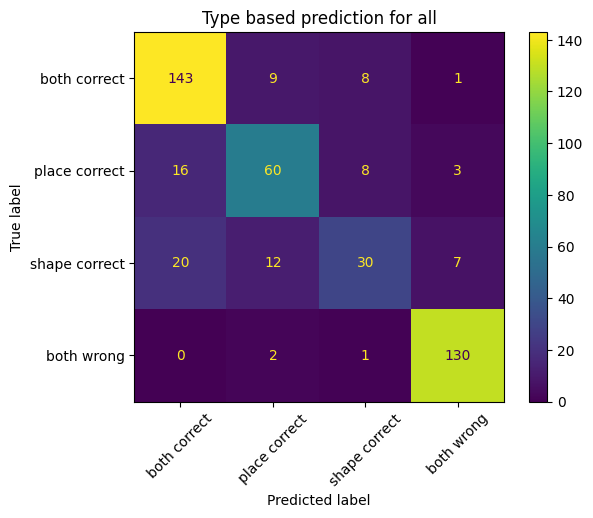

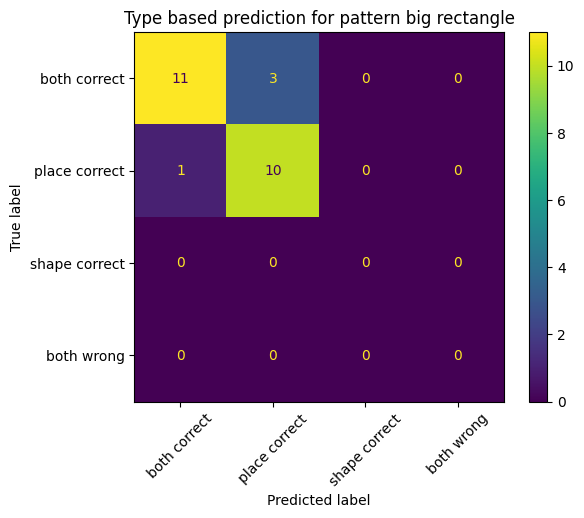

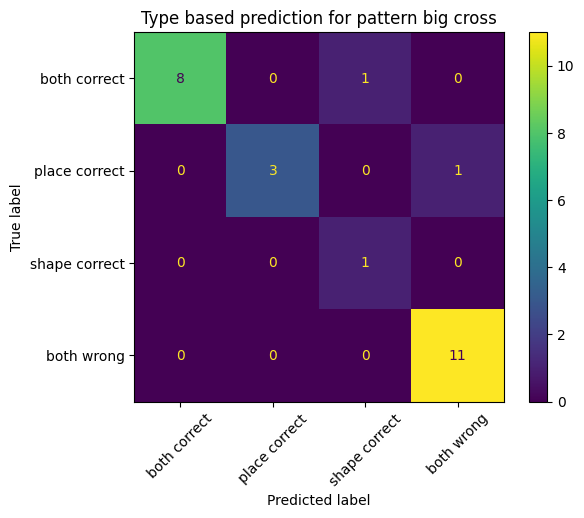

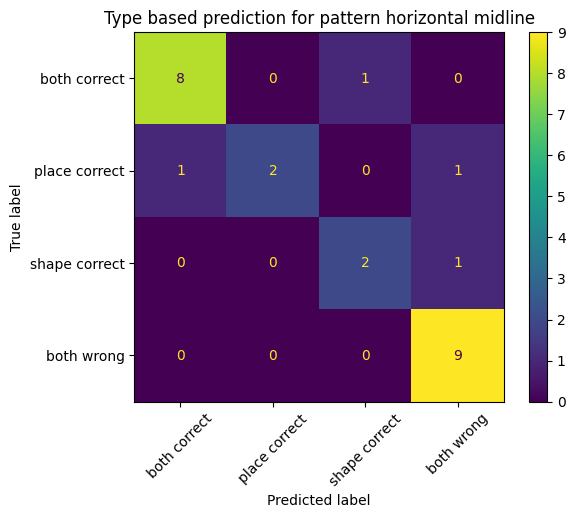

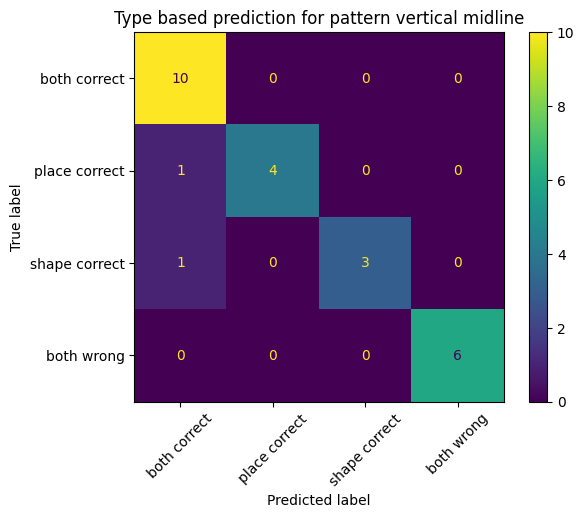

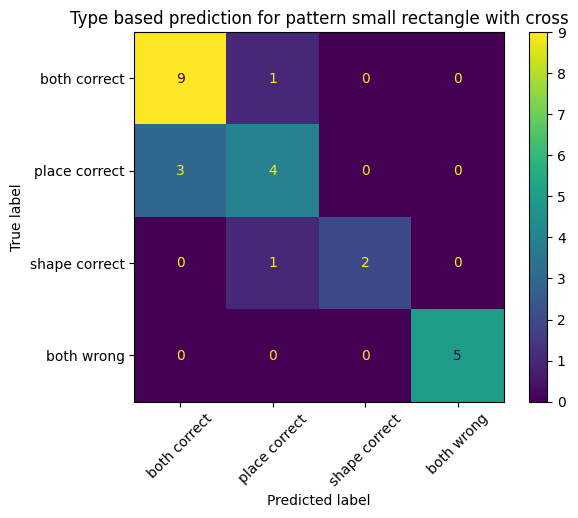

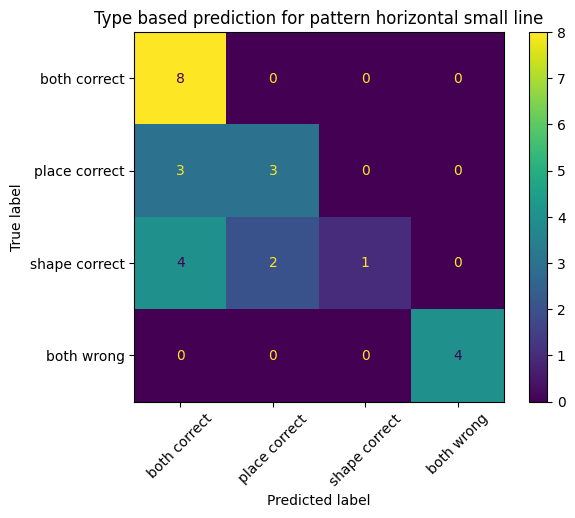

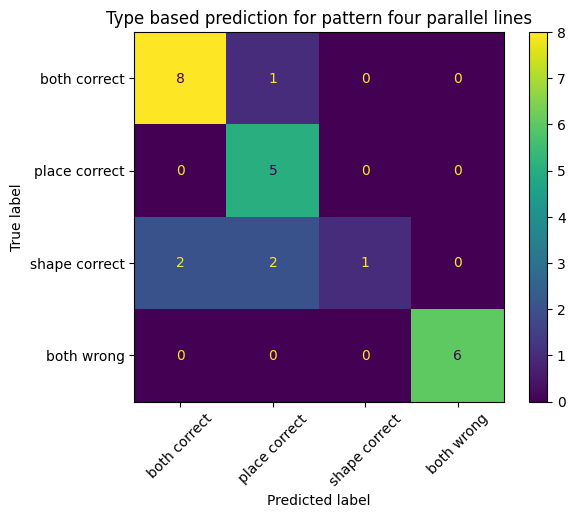

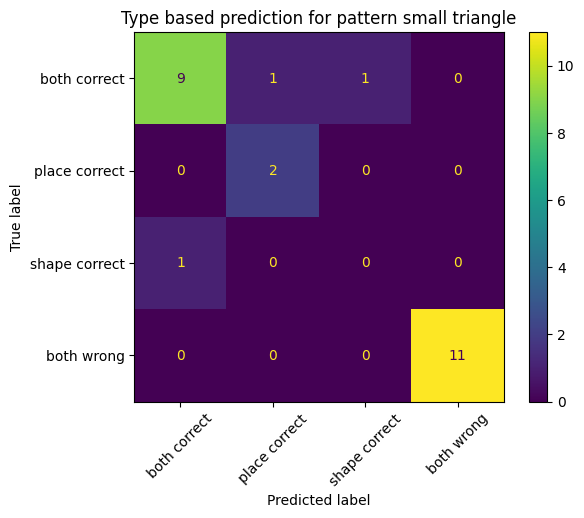

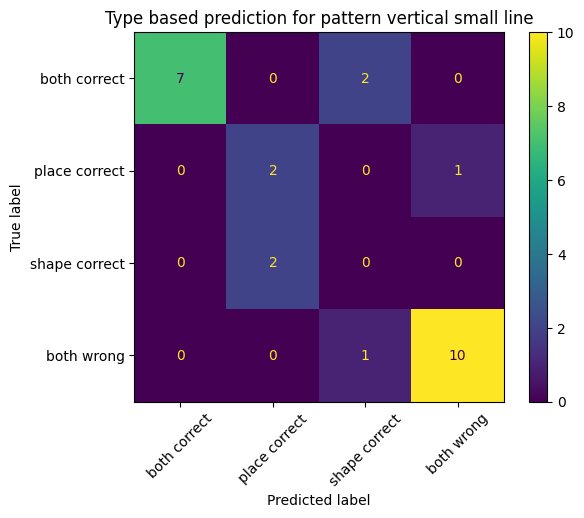

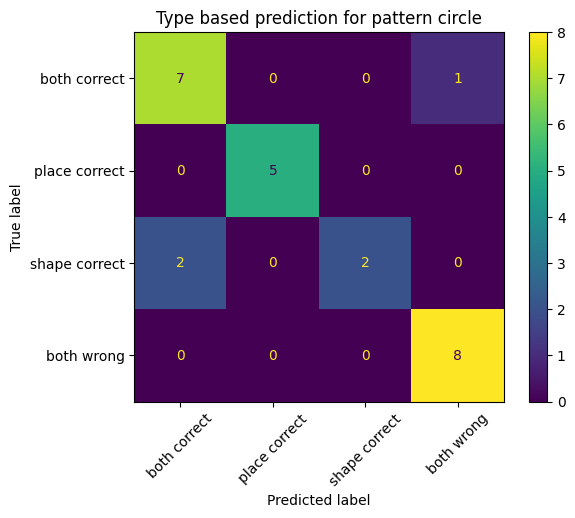

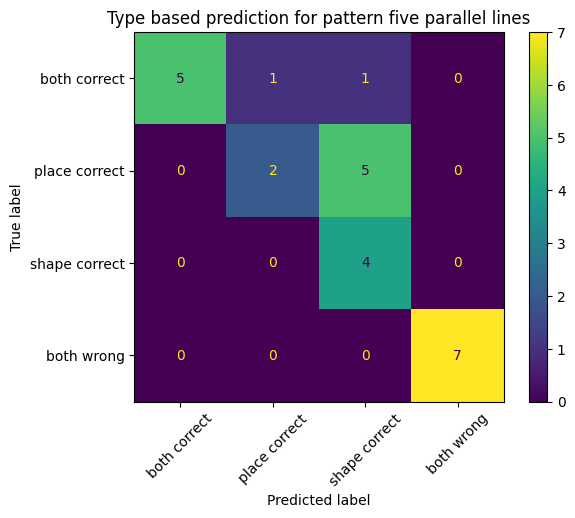

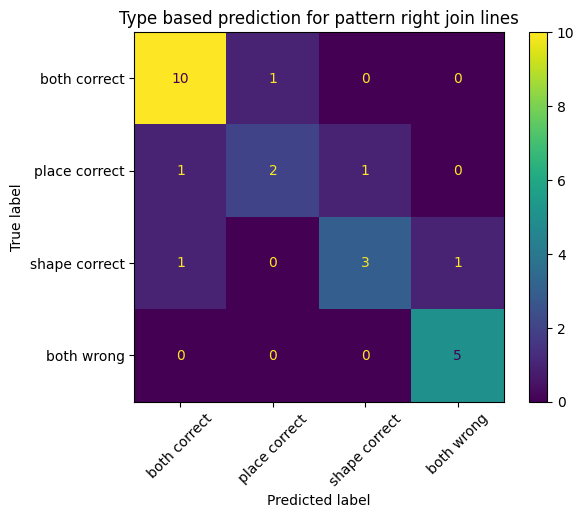

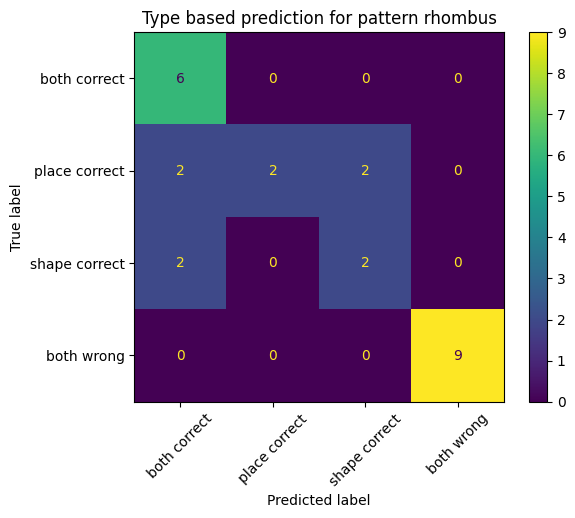

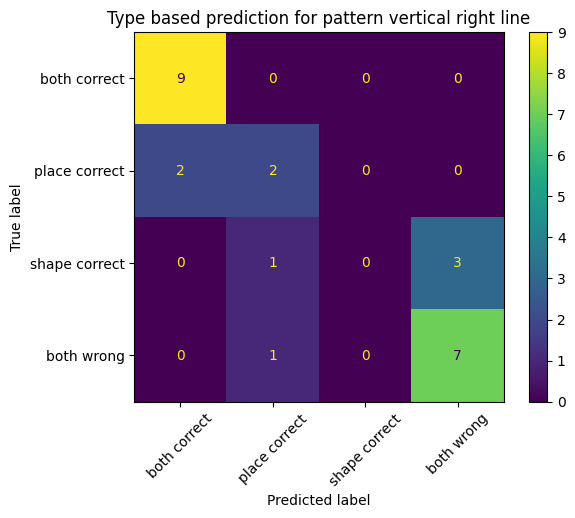

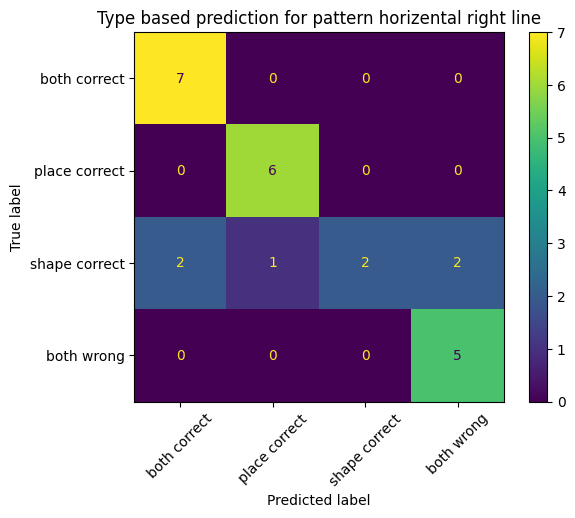

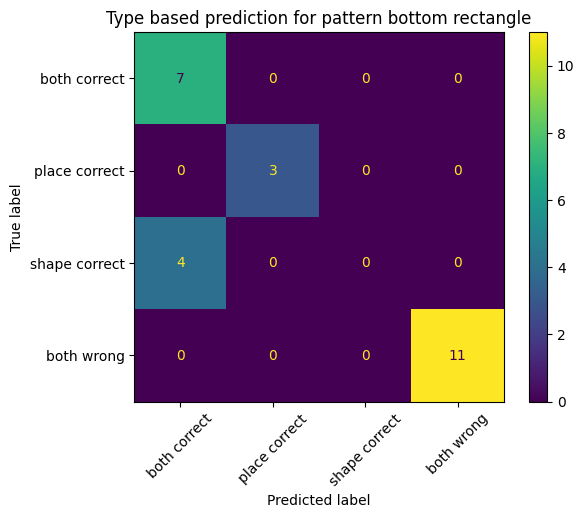

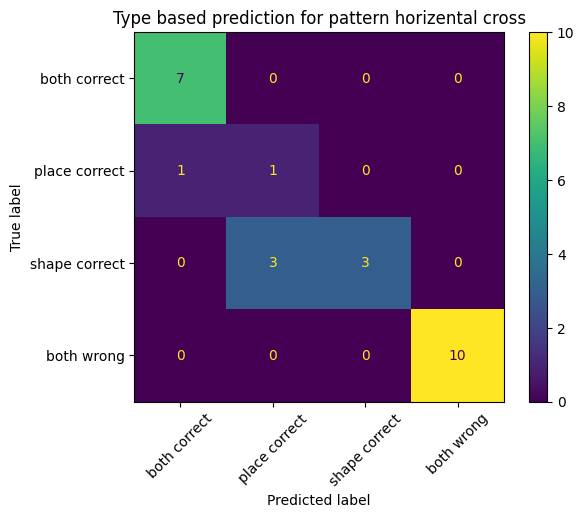

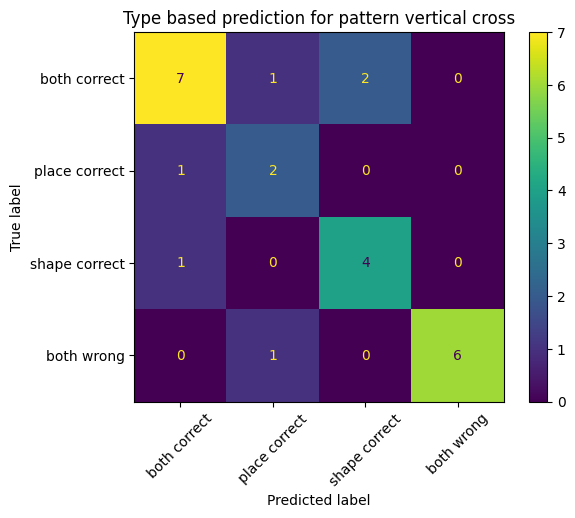

<Figure size 1440x4320 with 0 Axes>

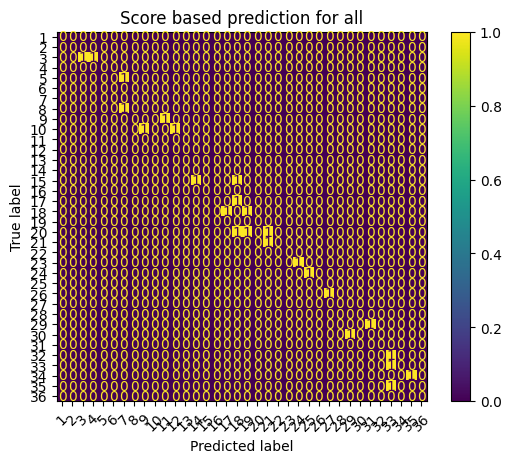

In [27]:
# handdrawing_ds = load_dataset("imagefolder", data_dir='/content/drive/MyDrive/data/reyscore-handdrawing-processed', drop_metadata=False)['train']
# handdrawing_ds.set_transform(val_transforms)
hd_outputs = trainer.predict(hd_test_ds)
print(hd_outputs.metrics)
cal_r_mae(hd_outputs, NUM_PATTERN)
draw_confusion_matrix(hd_outputs, num_pattern=NUM_PATTERN)

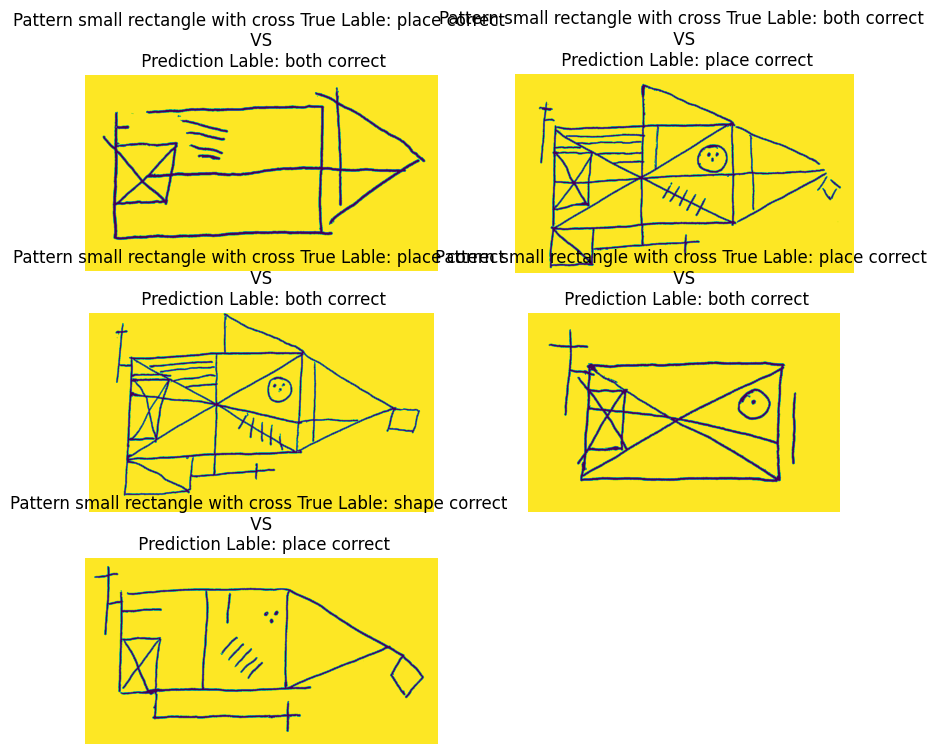

In [29]:
show_mislabeled_image(hd_outputs, pattern_id=5, dataset=hd_test_ds, num_pattern=NUM_PATTERN)

# Explainable AI

## Explainable AI with SHAP

In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
from datasets import Dataset
topk = 1
batch_size = 10
n_evals = 10
global PATTERN_ID
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def predict(input):
    global PATTERN_ID
    # Forward pass to get predictions
    model_input = {"pixel_values": nhwc_to_nchw(torch.tensor(input)).to(device), "labels": None}#torch.tensor(label).to(device)
    with torch.no_grad():
      output = trainer.model(**model_input)
      logits = output['logits']
    # print(f"predict: PATTERN_ID: {PATTERN_ID}")
    return logits.view(-1, NUM_PATTERN, 4)[:,PATTERN_ID,:]

class_names = []
class_names_bc = [f'pattern {ID_PATTERN[i+1]} \n both correct' for i in range(18)]
class_names_pc = [f'pattern {ID_PATTERN[i+1]} \n place correct' for i in range(18)]
class_names_sc = [f'pattern {ID_PATTERN[i+1]} \n shape correct' for i in range(18)]
class_names_bw = [f'pattern {ID_PATTERN[i+1]} \n both wrong' for i in range(18)]
for i in range(18):
  class_names.append([class_names_bc[i], class_names_pc[i],class_names_sc[i], class_names_bw[i]])
print(class_names)


[['pattern big rectangle \n both correct', 'pattern big rectangle \n place correct', 'pattern big rectangle \n shape correct', 'pattern big rectangle \n both wrong'], ['pattern big cross \n both correct', 'pattern big cross \n place correct', 'pattern big cross \n shape correct', 'pattern big cross \n both wrong'], ['pattern horizontal midline \n both correct', 'pattern horizontal midline \n place correct', 'pattern horizontal midline \n shape correct', 'pattern horizontal midline \n both wrong'], ['pattern vertical midline \n both correct', 'pattern vertical midline \n place correct', 'pattern vertical midline \n shape correct', 'pattern vertical midline \n both wrong'], ['pattern small rectangle with cross \n both correct', 'pattern small rectangle with cross \n place correct', 'pattern small rectangle with cross \n shape correct', 'pattern small rectangle with cross \n both wrong'], ['pattern horizontal small line \n both correct', 'pattern horizontal small line \n place correct', '

In [ ]:
import json
import random
import string
from typing import Optional

import matplotlib.pyplot as pl
import numpy as np
from matplotlib.colors import Colormap

try:
    from IPython.display import HTML, display
    have_ipython = True
except ImportError:
    have_ipython = False

import shap
from shap import Explanation
from shap.utils import ordinal_str
from shap.plots import colors
from shap import kmeans



def image_plot(shap_values: Explanation or np.ndarray,
          pixel_values: Optional[np.ndarray] = None,
          labels: Optional[list or np.ndarray] = None,
          true_labels: Optional[list] = None,
          width: Optional[int] = 20,
          aspect: Optional[float] = 0.2,
          hspace: Optional[float] = 0.2,
          labelpad: Optional[float] = None,
          cmap: Optional[str or Colormap] = colors.red_transparent_blue,
          show: Optional[bool] = True):
    """Plots SHAP values for image inputs.

    Parameters
    ----------
    shap_values : [numpy.array]
        List of arrays of SHAP values. Each array has the shape
        (# samples x width x height x channels), and the
        length of the list is equal to the number of model outputs that are being
        explained.

    pixel_values : numpy.array
        Matrix of pixel values (# samples x width x height x channels) for each image.
        It should be the same
        shape as each array in the ``shap_values`` list of arrays.

    labels : list or np.ndarray
        List or ``np.ndarray`` (# samples x top_k classes) of names for each of the
        model outputs that are being explained.

    true_labels: list
        List of a true image labels to plot.

    width : float
        The width of the produced matplotlib plot.

    labelpad : float
        How much padding to use around the model output labels.

    show : bool
        Whether ``matplotlib.pyplot.show()`` is called before returning.
        Setting this to ``False`` allows the plot
        to be customized further after it has been created.

    Examples
    --------

    See `image plot examples <https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/image.html>`_.

    """

    # support passing an explanation object
    if str(type(shap_values)).endswith("Explanation'>"):
        shap_exp = shap_values
        # feature_names = [shap_exp.feature_names]
        # ind = 0
        if len(shap_exp.output_dims) == 1:
            shap_values = [shap_exp.values[..., i] for i in range(shap_exp.values.shape[-1])]
        elif len(shap_exp.output_dims) == 0:
            shap_values = shap_exp.values
        else:
            raise Exception("Number of outputs needs to have support added!! (probably a simple fix)")
        if pixel_values is None:
            pixel_values = shap_exp.data
        if labels is None:
            labels = shap_exp.output_names

    # multi_output = True
    if not isinstance(shap_values, list):
        # multi_output = False
        shap_values = [shap_values]

    if len(shap_values[0].shape) == 3:
        shap_values = [v.reshape(1, *v.shape) for v in shap_values]
        pixel_values = pixel_values.reshape(1, *pixel_values.shape)

    # labels: (rows (images) x columns (top_k classes) )
    if labels is not None:
        if isinstance(labels, list):
            labels = np.array(labels).reshape(1, -1)

    label_kwargs = {} if labelpad is None else {'pad': labelpad}

    # plot our explanations
    x = pixel_values
    fig_size = np.array([4 * (len(shap_values) + 1), 2.5 * (x.shape[0] + 1)])
    if fig_size[0] > width:
        fig_size *= width / fig_size[0]
    fig, axes = pl.subplots(nrows=x.shape[0], ncols=len(shap_values) + 1, figsize=fig_size)
    if len(axes.shape) == 1:
        axes = axes.reshape(1, axes.size)
    for row in range(x.shape[0]):
        x_curr = x[row].copy()

        # make sure we have a 2D array for grayscale
        if len(x_curr.shape) == 3 and x_curr.shape[2] == 1:
            x_curr = x_curr.reshape(x_curr.shape[:2])

        # if x_curr.max() > 1:
        #     x_curr /= 255.

        # get a grayscale version of the image
        if len(x_curr.shape) == 3 and x_curr.shape[2] == 3:
            x_curr_gray = (
                    0.2989 * x_curr[:, :, 0] + 0.5870 * x_curr[:, :, 1] + 0.1140 * x_curr[:, :, 2])  # rgb to gray
            x_curr_disp = x_curr
        elif len(x_curr.shape) == 3:
            x_curr_gray = x_curr.mean(2)

            # for non-RGB multi-channel data we show an RGB image where each of the three channels is a scaled k-mean center
            flat_vals = x_curr.reshape([x_curr.shape[0] * x_curr.shape[1], x_curr.shape[2]]).T
            flat_vals = (flat_vals.T - flat_vals.mean(1)).T
            means = kmeans(flat_vals, 3, round_values=False).data.T.reshape([x_curr.shape[0], x_curr.shape[1], 3])
            x_curr_disp = (means - np.percentile(means, 0.5, (0, 1))) / (
                    np.percentile(means, 99.5, (0, 1)) - np.percentile(means, 1, (0, 1)))
            x_curr_disp[x_curr_disp > 1] = 1
            x_curr_disp[x_curr_disp < 0] = 0
        else:
            x_curr_gray = x_curr
            x_curr_disp = x_curr

        axes[row, 0].imshow(x_curr_disp, cmap=pl.get_cmap('gray'))
        if true_labels:
            axes[row, 0].set_title(true_labels[row], **label_kwargs)
        axes[row, 0].axis('off')
        if len(shap_values[0][row].shape) == 2:
            abs_vals = np.stack([np.abs(shap_values[i]) for i in range(len(shap_values))], 0).flatten()
        else:
            abs_vals = np.stack([np.abs(shap_values[i].sum(-1)) for i in range(len(shap_values))], 0).flatten()
        max_val = np.nanpercentile(abs_vals, 99.9)
        for i in range(len(shap_values)):
            if labels is not None:
                axes[row, i + 1].set_title(labels[row, i], **label_kwargs)
            print(f"the shape of (shap_values[i][row].shape): {shap_values[i][row].shape}")
            sv = shap_values[i][row] if len(shap_values[i][row].shape) == 2 else shap_values[i][row].sum(-1)
            print(f"the shape of sv: {sv.shape}")
            axes[row, i + 1].imshow(x_curr_gray, cmap=pl.get_cmap('gray'), alpha=0.15,
                                    extent=(-1, sv.shape[1], sv.shape[0], -1))
            im = axes[row, i + 1].imshow(sv, cmap=cmap, vmin=-max_val, vmax=max_val)
            axes[row, i + 1].axis('off')
    if hspace == 'auto':
        fig.tight_layout()
    else:
        fig.subplots_adjust(hspace=hspace)
    cb = fig.colorbar(im, ax=np.ravel(axes).tolist(), label="SHAP value", orientation="horizontal",
                      aspect=fig_size[0] / aspect)
    cb.outline.set_visible(False)
    if show:
        pl.show()




In [ ]:

def explain_results_all(ds, n_evals=10, batch_size=10, topk=1):
  global PATTERN_ID
  shap_values_list = []
  shap_output_list = []
  for pattern_id in range(NUM_PATTERN):#NUM_PATTERN
    PATTERN_ID= pattern_id
    # define a masker that is used to mask out partitions of the input image.
    masker_blur = shap.maskers.Image("blur(128, 128)", (224,224,3))#test_image['pixel_values'].shape

    # create an explainer with model and image masker
    explainer = shap.Explainer(predict, masker_blur, output_names=class_names[pattern_id])
    input_data = nchw_to_nhwc(torch.stack(ds['pixel_values'], dim=0)).numpy()

    shapvalues = explainer(
      input_data,
      max_evals=n_evals,
      batch_size=batch_size,
      outputs=shap.Explanation.argsort.flip[:topk],
    )
    values = [val for val in np.moveaxis(shapvalues.values, -1, 0)]
    # values = [np.moveaxis(val, 1, -1) for val in values]# the shape of the values need to be (224, 224, 3) instead of (3, 224, 224)
    shap_values_list.append(values)
    shap_output_list.append(shapvalues.output_names)

  shap_values = np.array(shap_values_list)
  shap_output_names = np.array(shap_output_list)
  # print(f"the shape of shap_values:{shap_values.shape}")
  shap_values = shap_values.reshape((NUM_PATTERN * topk, len(ds['image']), 224, 224, 3))
  shap_values_list = [val for val in shap_values]#!! important, cannot be np.array, otherwise the program will wrap it wih list
  # print(f"the shape of shap_values:{shap_values.shape}")
  images = ds['image']
  transform = Resize((224, 224))
  images = transform(images)
  image_arrays = [np.array(image) for image in images]
  images = np.stack(image_arrays, axis=0)
  id_type = {0: 'both correct', 1: 'place correct', 2:'shape correct', 3: 'both wrong'}
  output_names_list = []
  for id in range(shap_output_names.shape[0]):
    output_names = shap_output_names[id]
    if len(output_names) == 1 and len(ds['image']) != 1:#in case all the labels are the same, only one will be kept
      output_names = ([output_names for i in range(len(ds['image']))])
    output_names_list.append(output_names)
  output_names_list = np.array(output_names_list)
  # print(f"the shape of output names:{output_names_list.shape}")
  output_names_list = output_names_list.reshape((len(ds['image']), NUM_PATTERN))
  # print(f"the shape of output names:{output_names_list.shape}")
  image_plot(
      shap_values=shap_values_list,#need to be [numpy.array]
      pixel_values=images,
      labels=output_names_list,
      true_labels=ds['label'],
      width = 54,
  )

In [ ]:
def explain_results_pattern(ds, n_evals=10, batch_size=10, topk=1):
  global PATTERN_ID
  shap_values_list = []
  num_pattern = 18
  for pattern_id in range(num_pattern):#NUM_PATTERN
    PATTERN_ID= pattern_id
    # define a masker that is used to mask out partitions of the input image.
    masker_blur = shap.maskers.Image("blur(128, 128)", (224,224,3))#test_image['pixel_values'].shape

    # create an explainer with model and image masker
    explainer = shap.Explainer(predict, masker_blur, output_names=class_names[pattern_id])
    input_data = nchw_to_nhwc(torch.stack(ds['pixel_values'], dim=0)).numpy()

    shapvalues = explainer(
      input_data,
      max_evals=n_evals,
      batch_size=batch_size,
      outputs=shap.Explanation.argsort.flip[:topk],
    )
    # print(f'output names: {shapvalues.output_names}')
    shap_values_list = [val for val in np.moveaxis(shapvalues.values, -1, 0)]
    # shap_values_list = [np.moveaxis(val, 1, -1) for val in shap_values_list]# the shape of the values need to be (224, 224, 3) instead of (3, 224, 224)

    print(f"************explain pattern {pattern_id}")
    # shap_values = np.moveaxis(shap_values_list, 0, -1)
    images = ds['image']
    transform = Resize((224, 224))
    images = transform(images)
    image_arrays = [np.array(image) for image in images]
    images = np.stack(image_arrays, axis=0)
    id_type = {0: 'both correct', 1: 'place correct', 2:'shape correct', 3: 'both wrong'}
    output_names = shapvalues.output_names
    if len(output_names) == 1 and len(ds['image']) != 1:#in case all the labels are the same, only one will be kept
      output_names = np.array([shapvalues.output_names for i in range(len(ds['image']))])

    image_plot(
        shap_values=shap_values_list,#need to be [numpy.array]
        pixel_values=images,
        labels=output_names,
        true_labels=[list[pattern_id] for list in ds['label']],
    )

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (22

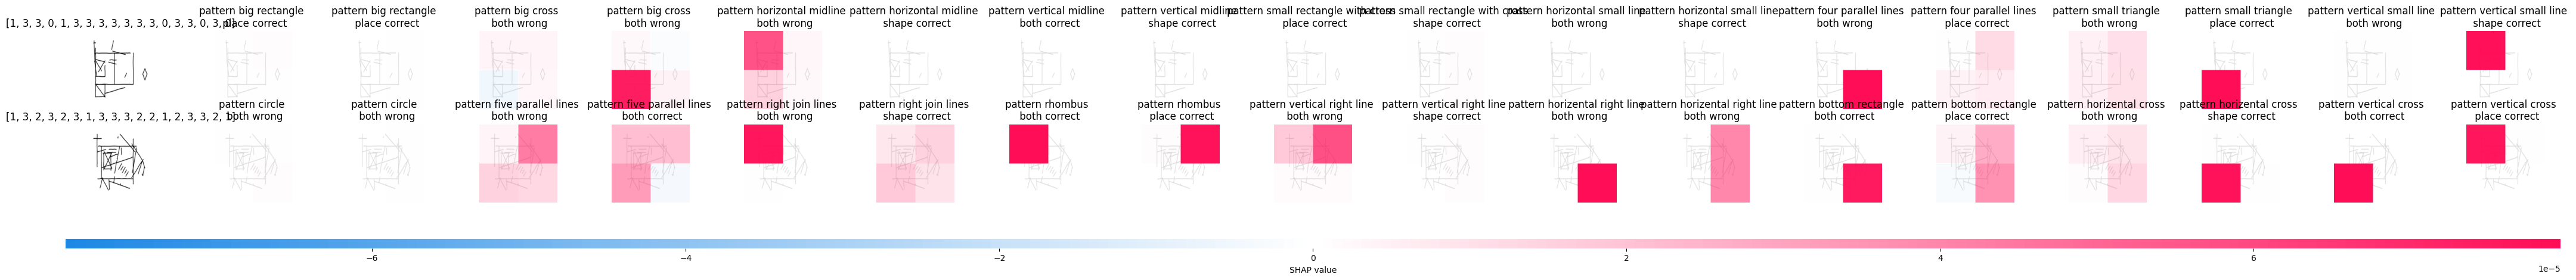

In [ ]:
explain_results_all(test_ds[1:3], n_evals=10)

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [12:03, 723.89s/it]              


************explain pattern 0
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


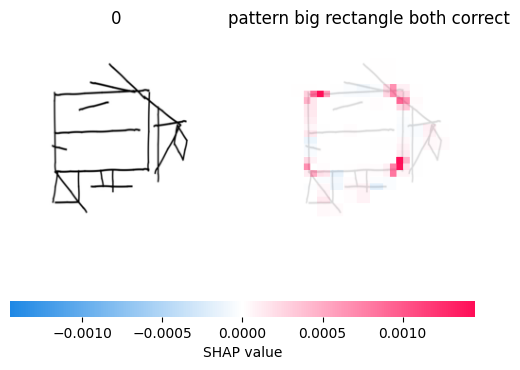

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:47, 707.97s/it]              


************explain pattern 1
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


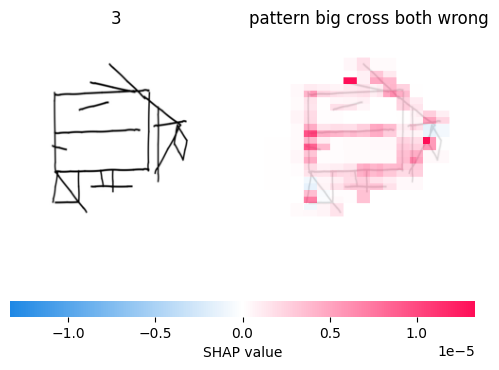

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:52, 712.87s/it]              


************explain pattern 2
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


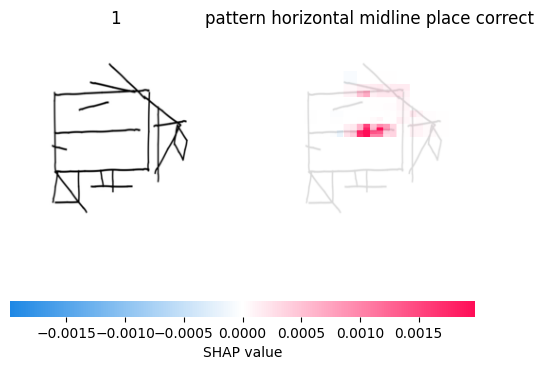

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:52, 712.48s/it]              


************explain pattern 3
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


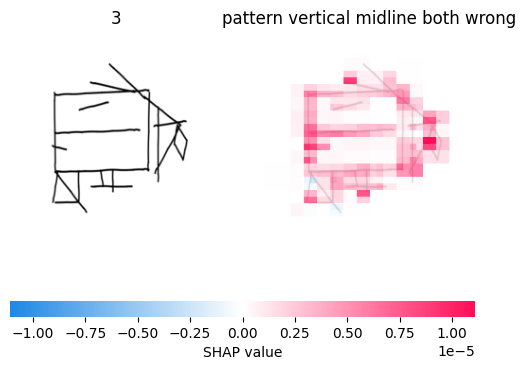

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:55, 715.14s/it]              


************explain pattern 4
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


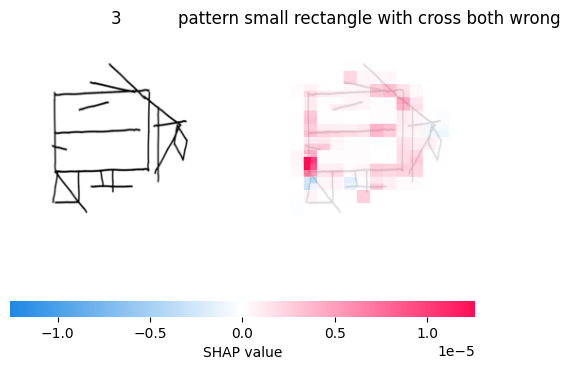

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:53, 713.38s/it]              


************explain pattern 5
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


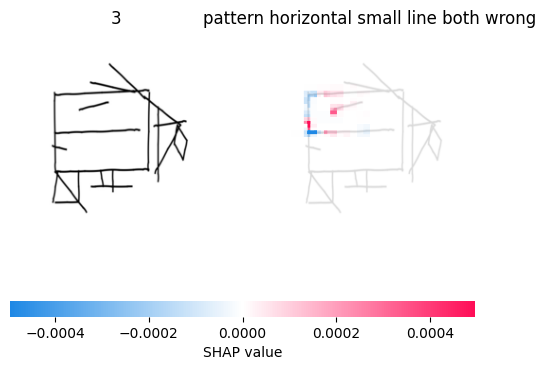

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:56, 716.11s/it]              


************explain pattern 6
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


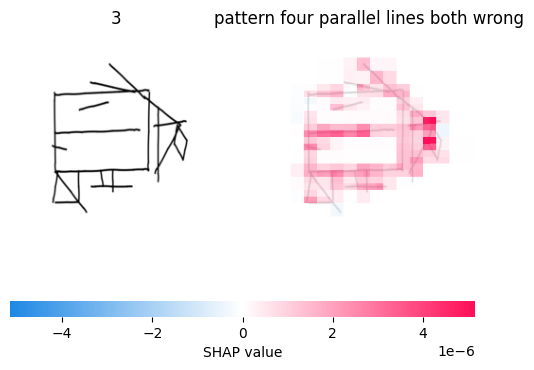

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [12:30, 750.05s/it]              


************explain pattern 7
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


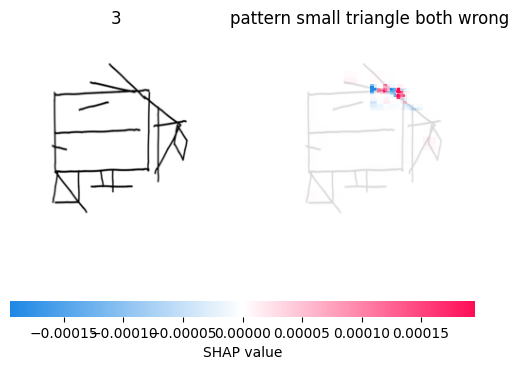

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:58, 718.86s/it]              


************explain pattern 8
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


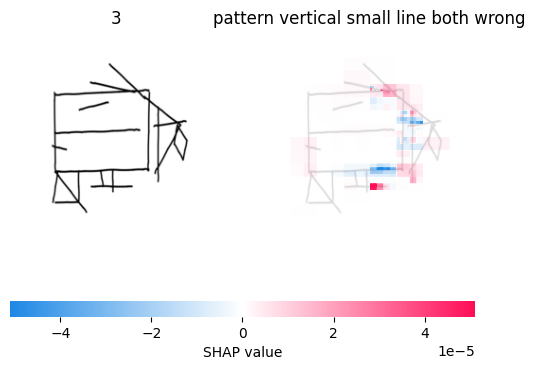

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [12:08, 728.07s/it]              


************explain pattern 9
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


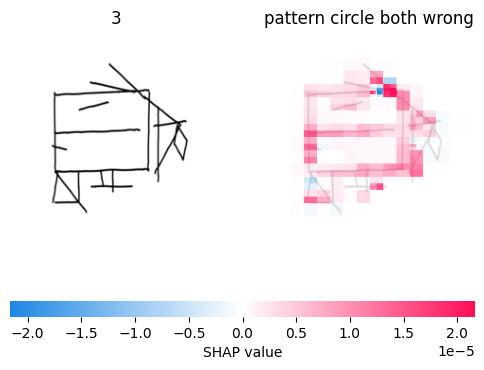

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:59, 719.59s/it]              


************explain pattern 10
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


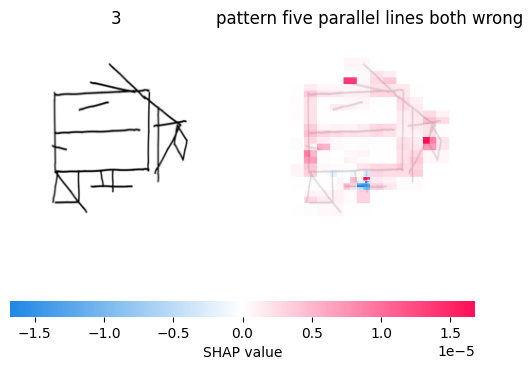

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:58, 718.81s/it]              


************explain pattern 11
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


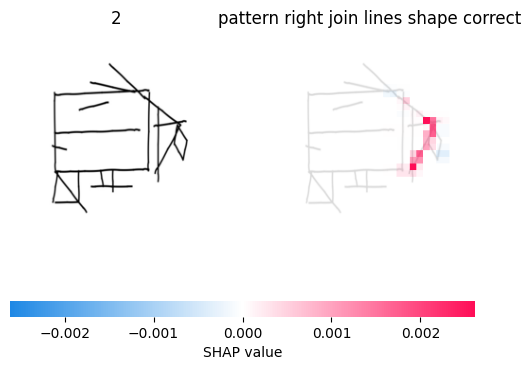

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [12:04, 724.74s/it]              


************explain pattern 12
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


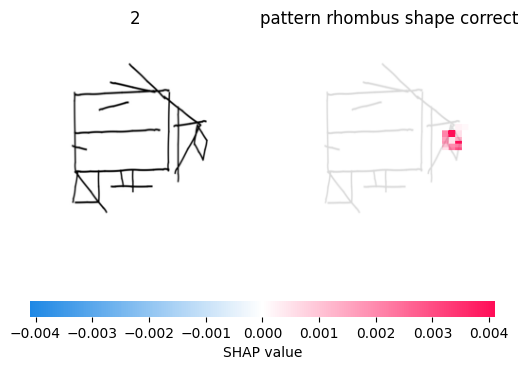

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:56, 716.51s/it]              


************explain pattern 13
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


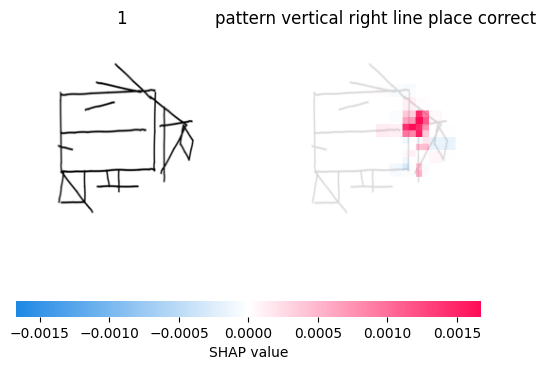

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:56, 716.75s/it]              


************explain pattern 14
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


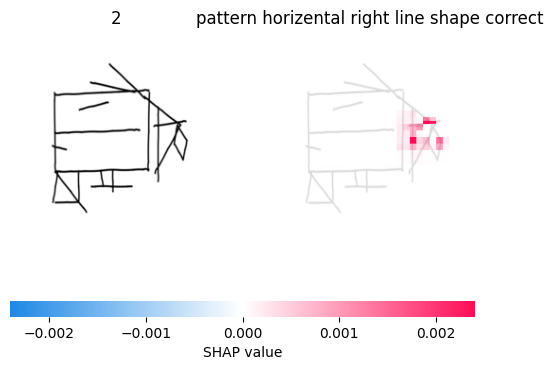

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:55, 715.90s/it]              


************explain pattern 15
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


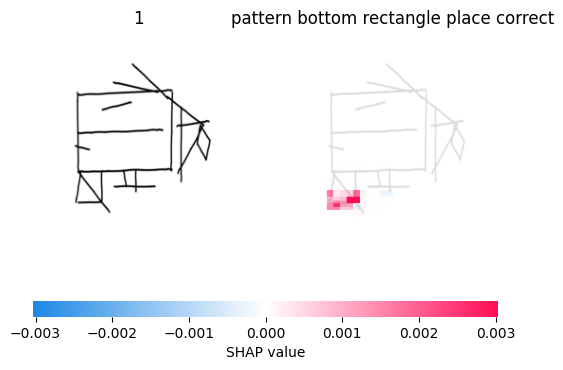

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:53, 713.66s/it]              


************explain pattern 16
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


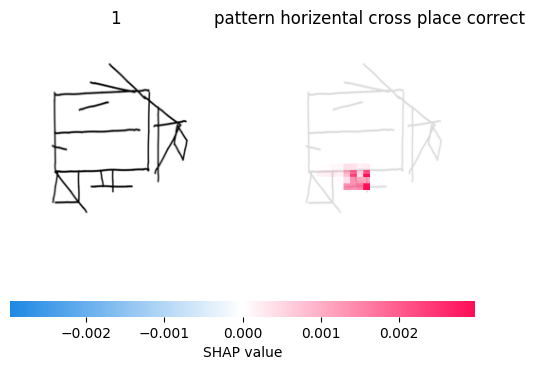

  0%|          | 0/2998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:58, 718.62s/it]              


************explain pattern 17
the shape of (shap_values[i][row].shape): (224, 224, 3)
the shape of sv: (224, 224)


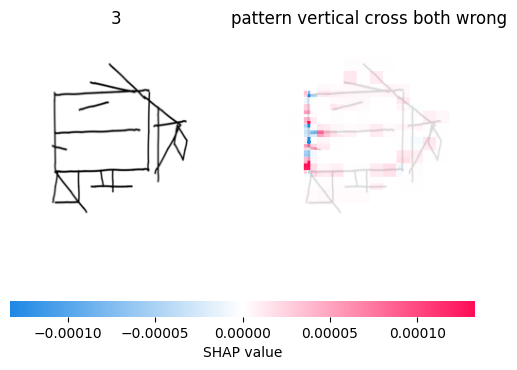

In [ ]:
explain_results_pattern(test_ds[179:180], n_evals=3000)